# Machine Learning / Surrogate Modelling

The is an analysis on the white wine data from UCL depository, predicting wine quality based on wine attributes. The learning task is a classical supervised classification with binarized classes (good wine vs. bad wine). The dataset is chosen as it is very clean and there's no missing attributes ( I do enjoy my fair share of white wine as well). The final model achieves an accuracy of 85%. Inspired by the linear programming paper reading, interpretability and visualization of the prediction models are focused. The analysis structure is outlined as follows: 

- Dataset background 
    - dataset info 
    - wine read on acidity 
- Data Pre-processing 
    - EDA 
        - Balancing dataset 
        - Outliers? 
    - Feature Engineering 
        - Feature Scaling 
        - Feature Importance 
- Model (grid search + cross validation) 
    - Logistic Regression
    - Decision Tree 
    - Random Forest
    - XGBoost 
    - Support Vector Machine 
    - K-Nearest Neighbor
    - Neural Network 
- Model Interpretability: Feature importance 

<img src="wine.png">


## 0. Dataset Import & Library Set-up

In [2]:
# pip install sklearn
# import libraries 
import pandas as pd
import numpy as np

# visualization libraries 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
plt.style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc
import sklearn
# pip install xgboost
import xgboost
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load Dataset: UCL
# https://archive.ics.uci.edu/ml/datasets/wine+quality
df_wine = pd.read_csv('winequality-white.csv',";")
df_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [4]:
df_wine.shape

(4898, 12)

### 0.1 Dataset and Wine Background Info

"The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.)." [1]

The dataset has 11+1 variables and 4898 rows of data. Below info is taken from the UCL data depository. 
<br>
<br>

Input variables (based on physicochemical tests):
   
1 - **fixed acidity**: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2 - **volatile acidity**: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3 - **citric acid**: found in small quantities, citric acid can add ‘freshness’ and flavor to wines

4 - **residual sugar**: the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5 - **chlorides**: the amount of salt in the wine

6 - **free sulfur dioxide**: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7 - **total sulfur dioxide**: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8 - **density**: the density of water is close to that of water depending on the percent alcohol and sugar content

9 - **pH**: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10 - **sulphates**: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11 - **alcohol**: the percent alcohol content of the wine
<br>
<br>
<br>
Output variable (based on sensory data): 

12 - **quality** (score between 0 and 10)

<br>

###  0.2 Extra Info on Acidity of Wine [1]

- Acids are major wine constituents and impart the sourness or tartness in wine taste. 
- Wine lacking in acid are "flat"
- Chemically, the acids affects taste and pH, which affects color, stability to oxidation, and consequently the overall lifespan of a wine. 
- Acids in wine are either from grapes or as a result of the fermentation process from either yeast and/alcohol. 
- Total acidity is traditionally divided into two groups: volatile acids and nonvolatile/fixed acids. 
- Predominant fixed acids: tartaric (1000 to 4000 mg/L), malic (0-8000 mg/L), citric (0-500 mg/L) and succinic (500-2000 mg/L). All of the acids originate in grapes except of succinic acid, which is produced by yeast during the fermentation process. 
- Wine produced from cool climate, grapes are high in acidity and would taste sour. 
- Warm grapes can be low in acid, more or less depending on variety. 
- Currently, winemakers in califronia, are pushing wines to high pH levels, as high as 4.0, while 20 years ago pH's above 3.6 were usual. This change makes wines taste softer, apparently it's popular today. 

<br>

In [5]:
%time df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
CPU times: user 4.58 ms, sys: 792 µs, total: 5.37 ms
Wall time: 4.63 ms


In [6]:
%time np.isnan(df_wine.values).any()

CPU times: user 214 µs, sys: 1.11 ms, total: 1.32 ms
Wall time: 832 µs


False

There's no null value and missing values as expected. Data has only float and integer values. No incorrect formats or headers. 

## 1. EDA: Exploratory Data Analysis 
- Data distribution 
- Outliers 
- Balance 

### 1.1 Checking for Outliers 

In [7]:
df_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

There are a couple different scales among the features. Feature scaling could be considered. 

Also, the 50% (median) for all features are smaller than their perspective means. For free sulfur dioxide, total sulfur dioxide and residual sugar, there's a significant difference between 75% and max values, which suggests there could be outliers in the data. A check on outliers could be considered. 

Actually, let's have a closer look on these three features. 

In [8]:
def plot(feature,output='quality'):
    sns.factorplot(x=output,y=feature,data=df_wine,kind='violin',size=9,aspect=1.3,linewidth=2)
    sns.factorplot(x=output,y=feature,data=df_wine,kind='swarm',size=9,aspect=1.3)

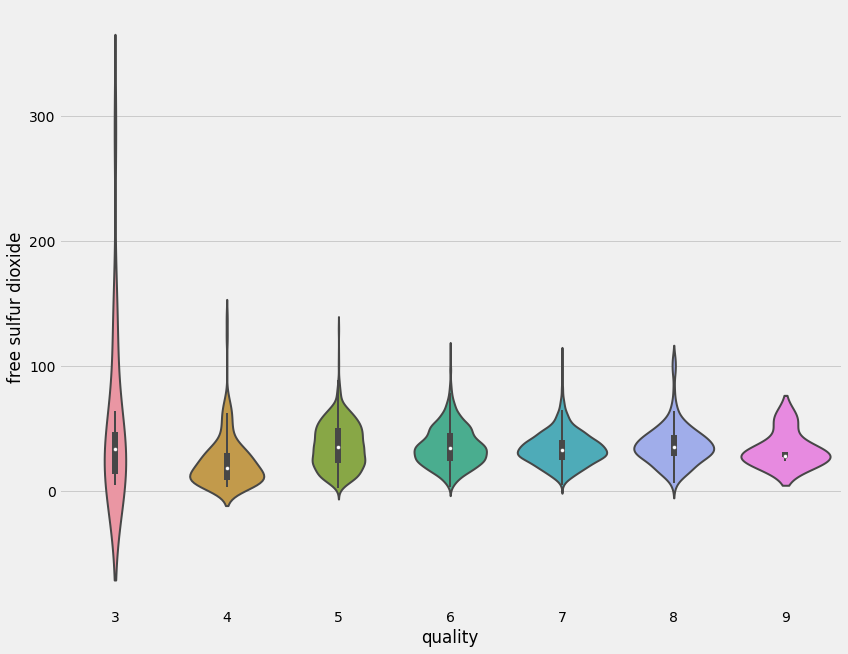

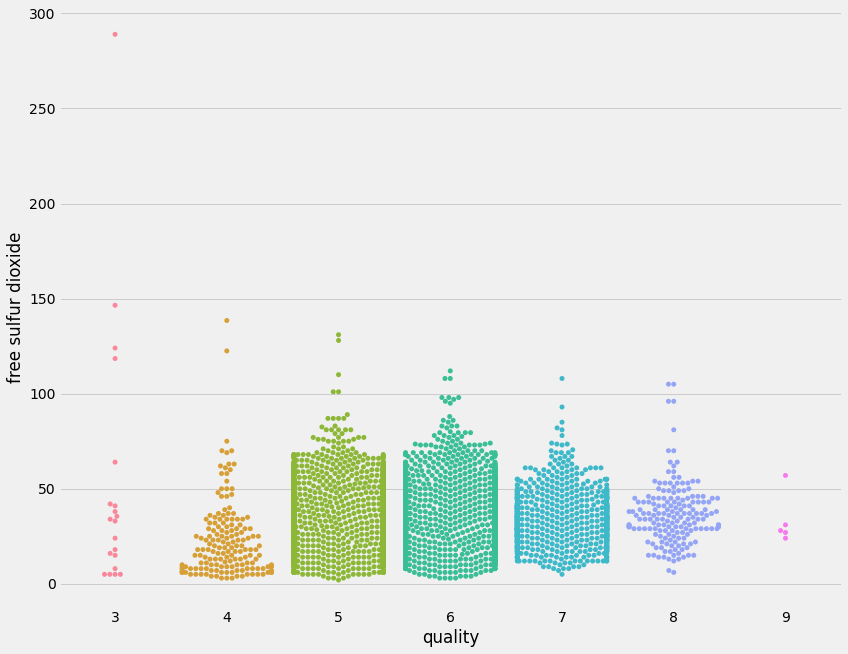

In [9]:
plot('free sulfur dioxide','quality')

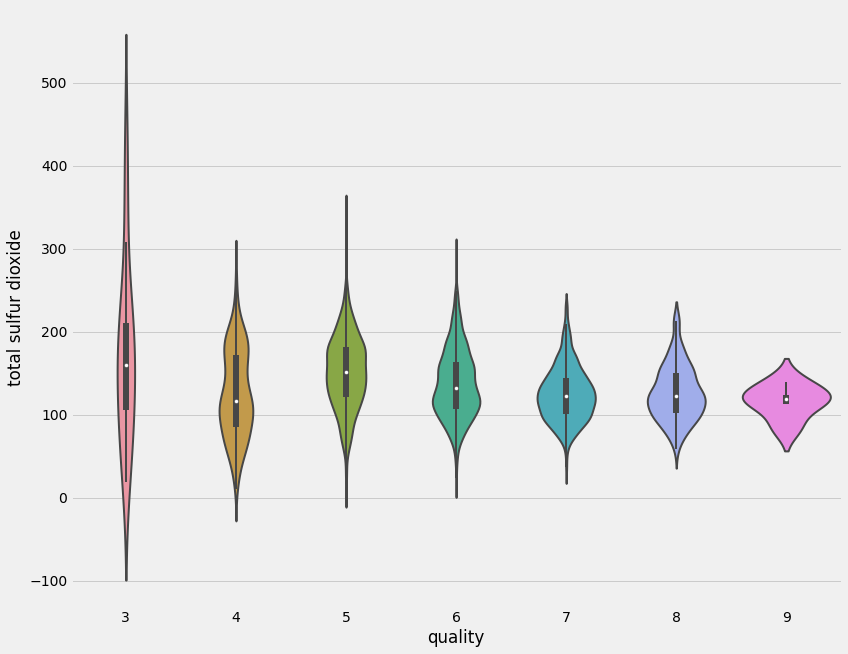

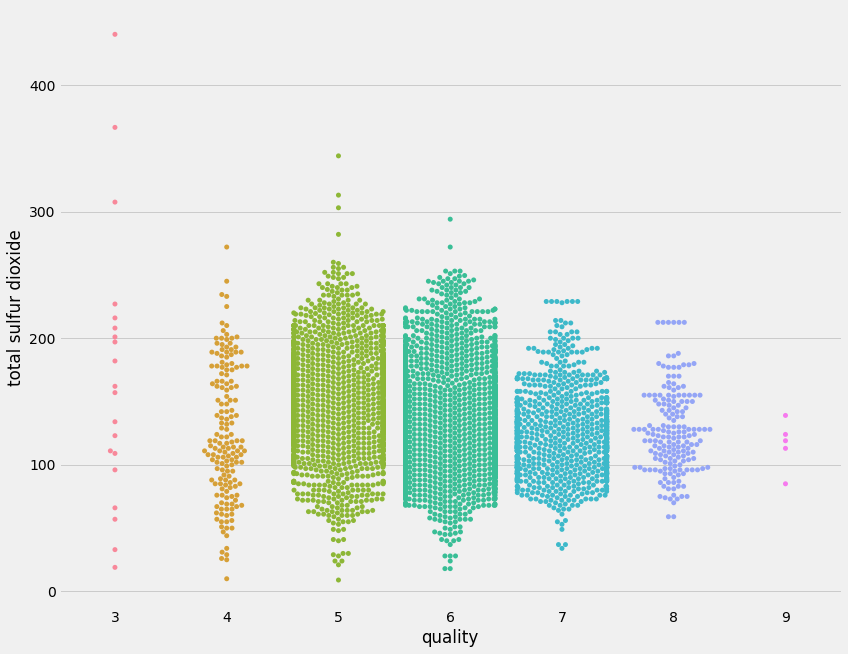

In [10]:
plot('total sulfur dioxide','quality')

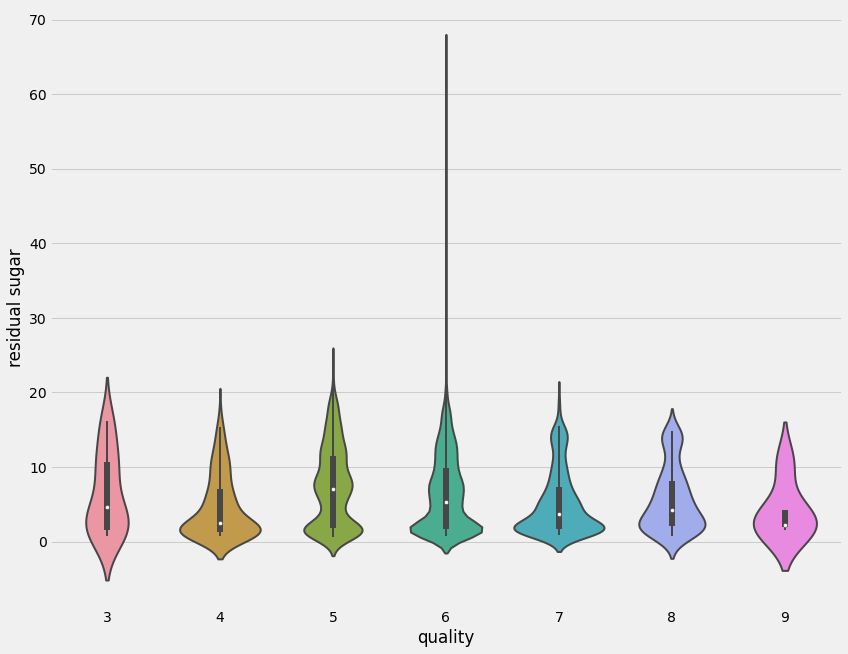

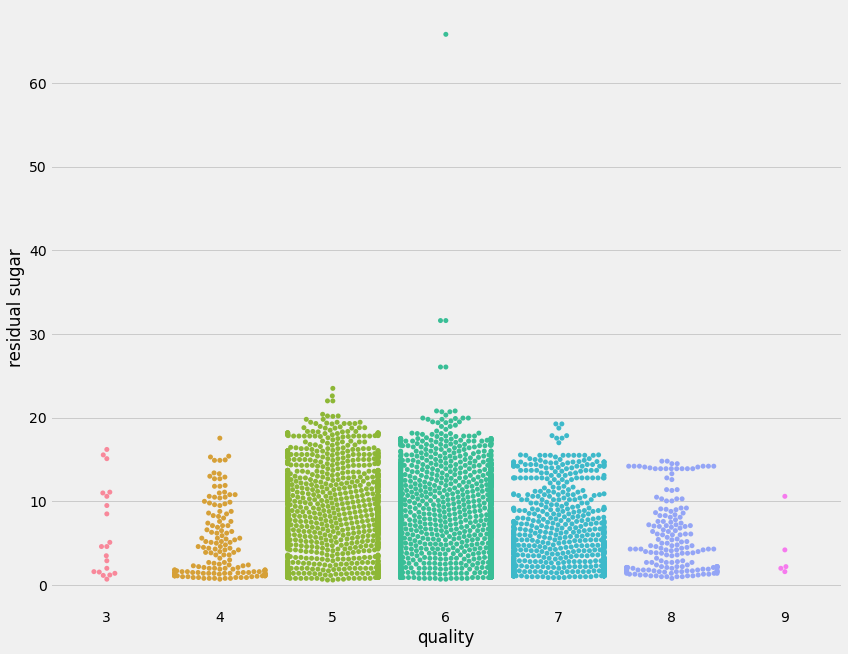

In [11]:
plot('residual sugar','quality')

Since I don't have expert knowledge on wine, I only feel confident to remove the two extreme data points of free sulfur dioxide, and residual sugar.

In [12]:
# drop max residual sugar and max 
df_wine.loc[df_wine['residual sugar'].idxmax()]

fixed acidity             7.80000
volatile acidity          0.96500
citric acid               0.60000
residual sugar           65.80000
chlorides                 0.07400
free sulfur dioxide       8.00000
total sulfur dioxide    160.00000
density                   1.03898
pH                        3.39000
sulphates                 0.69000
alcohol                  11.70000
quality                   6.00000
Name: 2781, dtype: float64

In [13]:
df_wine.loc[df_wine['free sulfur dioxide'].idxmax()]

fixed acidity             6.10000
volatile acidity          0.26000
citric acid               0.25000
residual sugar            2.90000
chlorides                 0.04700
free sulfur dioxide     289.00000
total sulfur dioxide    440.00000
density                   0.99314
pH                        3.44000
sulphates                 0.64000
alcohol                  10.50000
quality                   3.00000
Name: 4745, dtype: float64

In [14]:
df_wine.drop(df_wine['residual sugar'].idxmax(),inplace = True)
df_wine.drop(df_wine['free sulfur dioxide'].idxmax(),inplace = True)
# check the shape - should be 4898 - 2 = 4896 - just in csae we run the last cell twice 
df_wine.shape[0]

4896

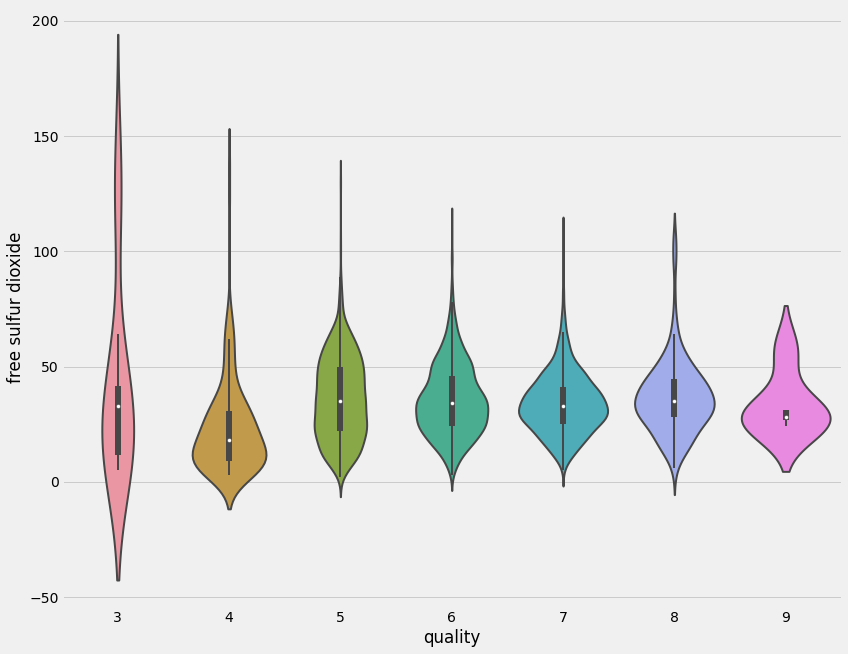

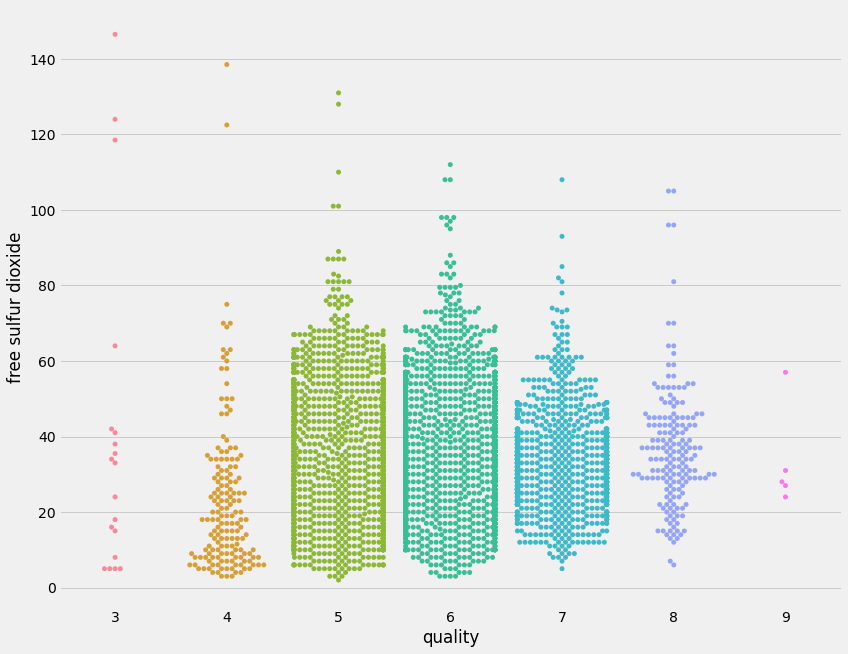

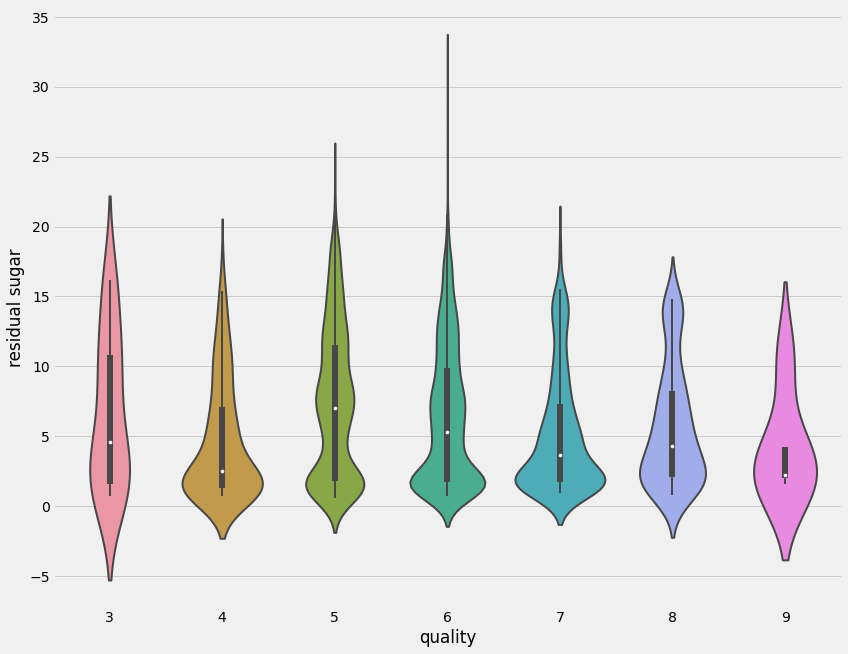

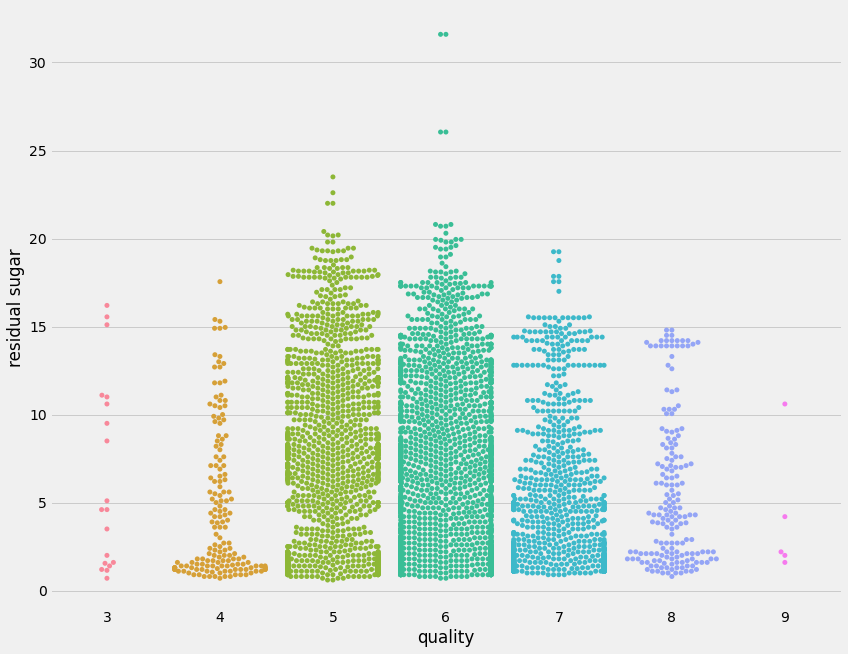

In [15]:
# check again the two feature distribution 
plot('free sulfur dioxide','quality')
plot('residual sugar','quality')

Looks kinda better. More could be done on outliers analysis such as statistical testings: hypothesis testing, z-score, etc. 

In [16]:
# source: https://www.kaggle.com/nareshbhat/outlier-the-silent-killer
import numpy as np
import scipy.stats as stats 

def grubbs_test(x):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    print("Grubbs Calculated Value:",g_calculated)
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    print("Grubbs Critical Value:",g_critical)
    if g_critical > g_calculated:
        print("From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers\n")
    else:
        print("From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers\n")

In [17]:
grubbs_test(df_wine['residual sugar'])

Grubbs Calculated Value: 5.043241337553394
Grubbs Critical Value: 4.408465677720546
From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers



In [18]:
# use z-score method to find out the outliers 
# If the z score of a data point is more than 3 (because it cover 99.7% of area)
# it indicates that the data value is quite different from the other values. 
# It is taken as outliers.
outliers=[]
def Zscore_outlier(df):
    for i in df: 
        z = (i-np.mean(df))/np.std(df)
        if np.abs(z) > 3: 
            outliers.append(i)
    print("Outliers:",outliers)
    
Zscore_outlier(df_wine['residual sugar'])

Outliers: [22.0, 22.0, 23.5, 31.6, 31.6, 26.05, 26.05, 22.6]


Statistically speaking, more data could be trimmed for the residual sugar features as outliers (for example, the two max values of with wine quality = 6). However, as mentioned before, I am not an expert on wine and I am erring on the side of caution, therefore, I will keep them in for now. A more comprehensive outlier studies should be conducted for each feature , with input from wine sommelier. Outlier study can be a quite complicate and delicate business. Below is an example of a more comprehensive outlier study. Note that the result, df_wine_dropped_out is not carried through for the rest of the assignment. 

#### *An example for a more comprehensive outlier study:*

In [19]:
# example for a more comprehensive outlier study
def grubbs_test_2(x):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    #print("Grubbs Calculated Value:",g_calculated)
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    #print("Grubbs Critical Value:",g_critical)
    if g_critical > g_calculated:
        return False 
    else:
        return True 

def Zscore_outlier_2(col):
    outliers=[]
    for i in col: 
        z = (i-np.mean(col))/np.std(col)
        if np.abs(z) > 3: 
            outliers.append(i)
    return outliers    

def drop_outliers(df,output='quality'): # not tested
    df_copy = df.copy() # just in case - deep copy - deep = true 
    for col in df_copy.columns:
        if col != output: # only features we are manipulating
            if grubbs_test_2(df_copy[col]) == True: # if there's outliers by grubbs test 
                print (col,"has outliers")
                out_list = Zscore_outlier_2(df_copy[col]) # generate outlier list with z-score testing
                df_copy = df_copy[~df_copy[col].isin(out_list)] # drop outlier for each column 
    print(df.shape[0]-df_copy.shape[0],"outliers has been droppped")    
    return df_copy

# then proceed with a comparison on the model accuracy (and other model error measurement evaluations ) 
# of df_dropped_outlier vs df_original

In addition to statistical testing, plotting out the distribution of the features can help on outlier decisions. 

In [20]:
# create a seperate list for features 
output = 'quality'
feature_list = list(df_wine.columns)
feature_list.remove(output)

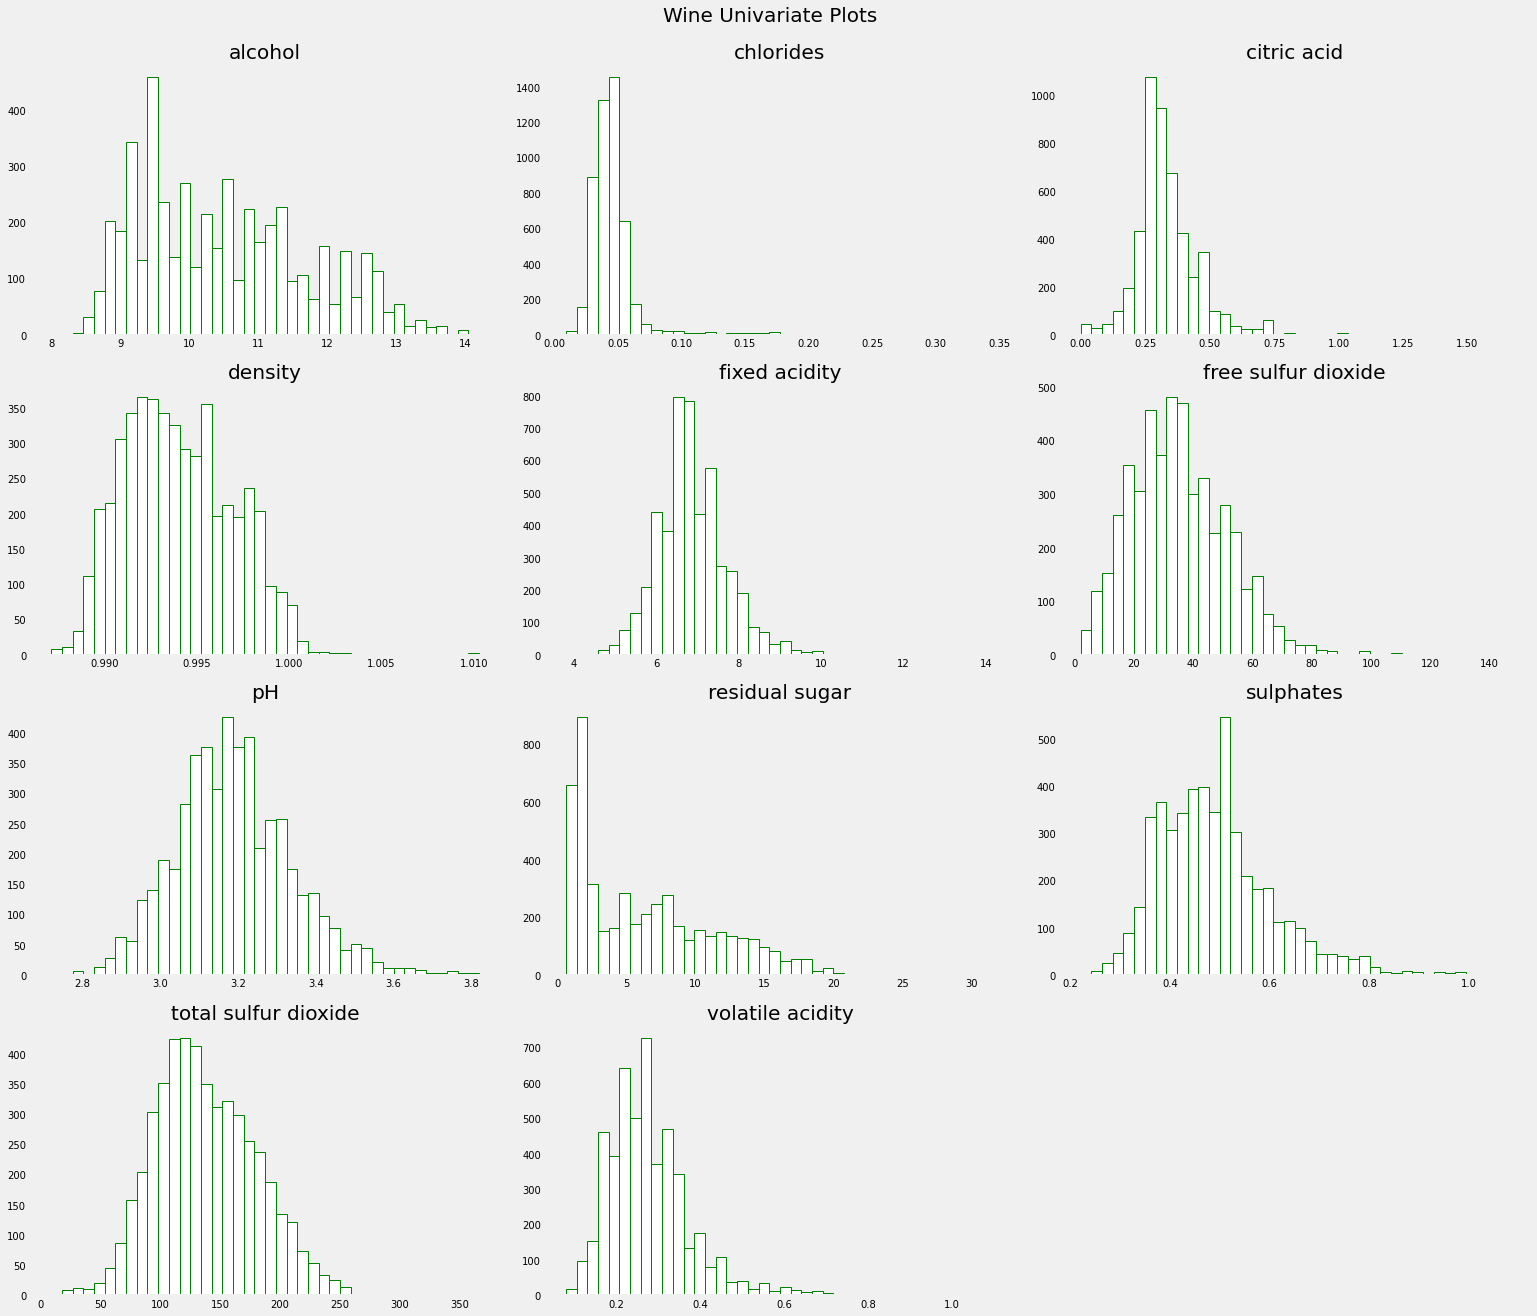

In [21]:
# check the distribution of features 
df_wine[feature_list].hist(bins=40, edgecolor='g', linewidth=1.0,
                          xlabelsize=10, ylabelsize=10, grid=False, 
                          figsize=(18,15), color='white')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Wine Univariate Plots', x=0.6, y=1.22, fontsize=20);

We can see there are some long right end tails for features such as Chlorides, sulphates, pH, citric acid, and volatile acidity. Let's proceed to drop all outliers and see the new distribution. 

In [22]:
df_wine_dropped_out = drop_outliers(df_wine,output='quality')

fixed acidity has outliers
volatile acidity has outliers
citric acid has outliers
residual sugar has outliers
chlorides has outliers
free sulfur dioxide has outliers
total sulfur dioxide has outliers
sulphates has outliers
382 outliers has been droppped


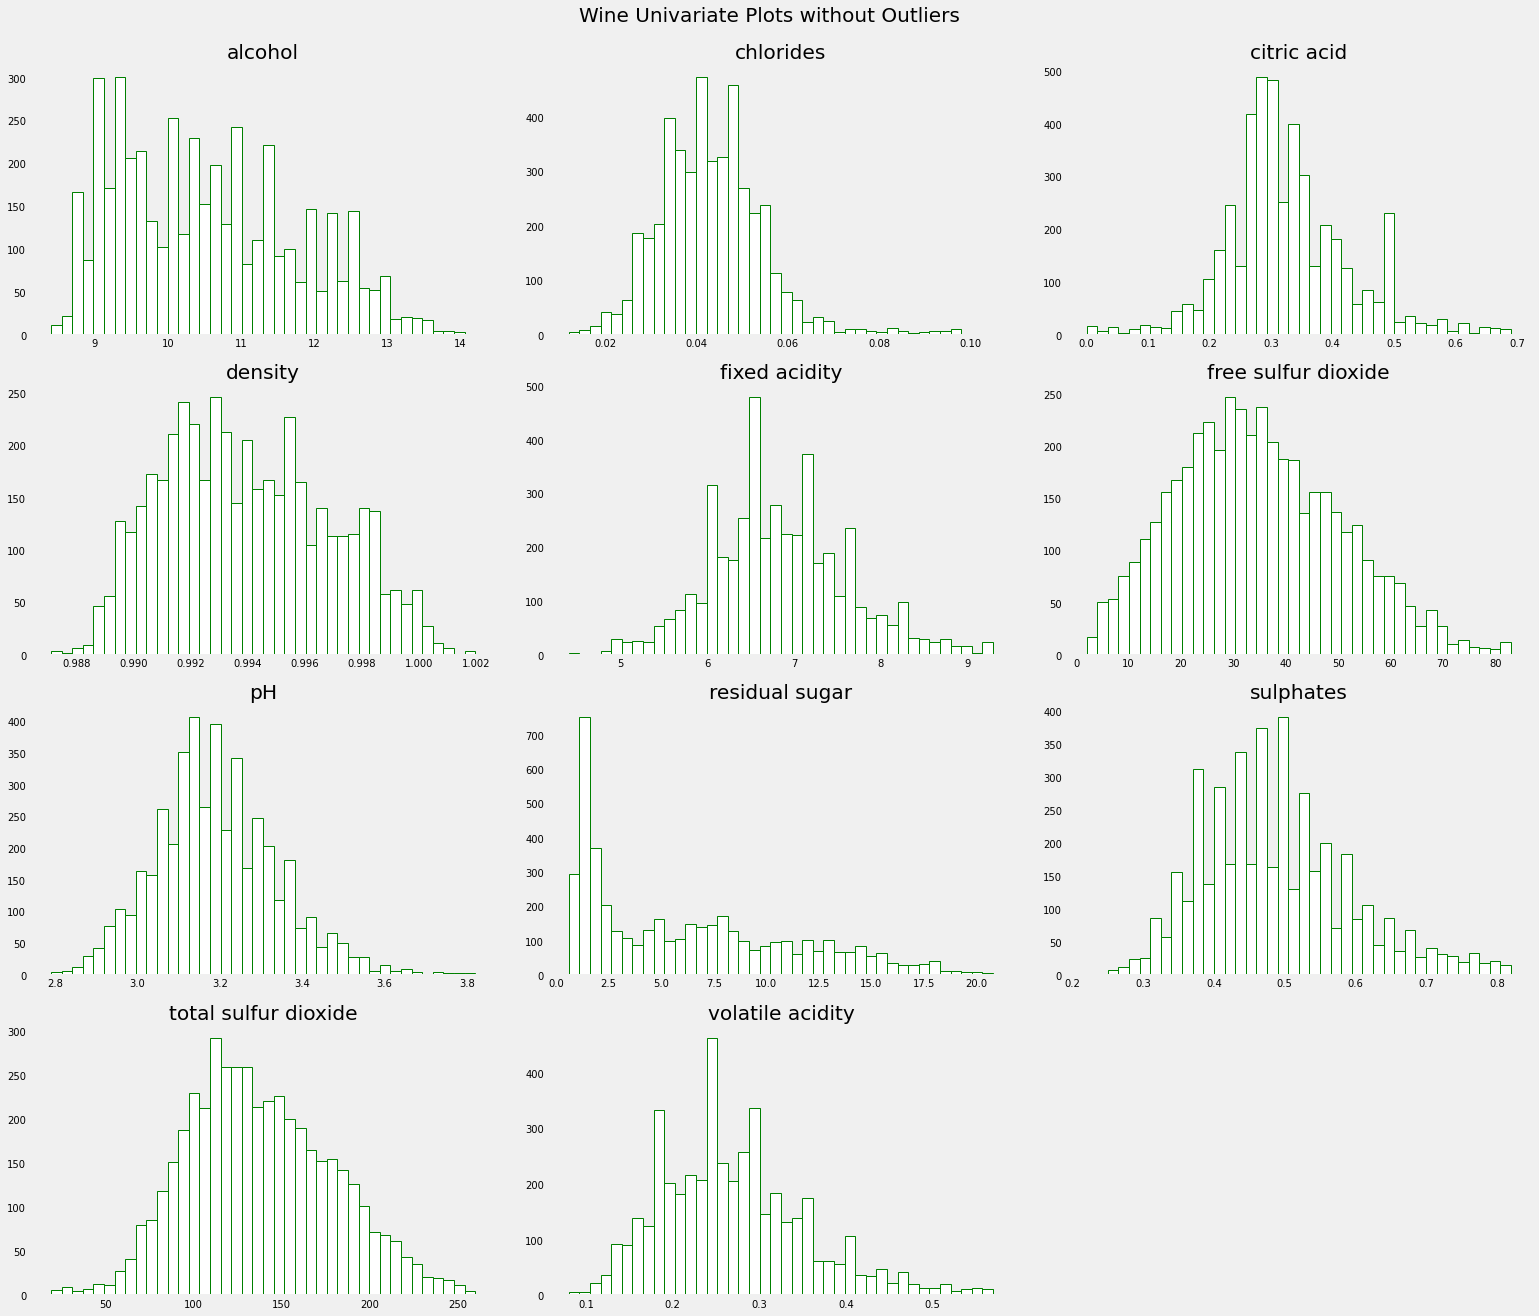

In [23]:
# check the distribution of features of the df_wine_dropped_out
df_wine_dropped_out[feature_list].hist(bins=40, edgecolor='g', linewidth=1.0,
                          xlabelsize=10, ylabelsize=10, grid=False, 
                          figsize=(18,15), color='white')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Wine Univariate Plots without Outliers', x=0.6, y=1.22, fontsize=20);

Is it really a good thing to drop out the outliers? A comparison study on df 1 (including outliers) and df 2 (excluding outliers) should be conducted to find the answer. 

In addition, what we have implemented here is univariate outlier detection with parametric methods. A comprehensive outlier study could also involve multi-variate outlier study and approaching with non-parametric methods. 

### 1.2 Class Distribtion 

In [24]:
# check the count of each class 
df_wine['quality'].value_counts()

6    2197
5    1457
7     880
8     175
4     163
3      19
9       5
Name: quality, dtype: int64

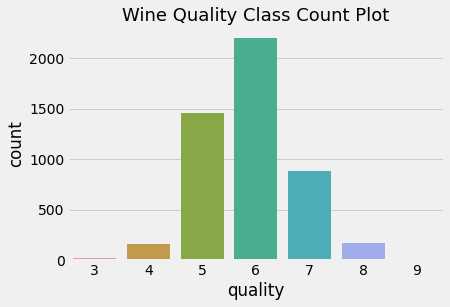

In [25]:
sns.countplot(x="quality", data=df_wine)
plt.title("Wine Quality Class Count Plot",fontsize=18);

We can see there exists an imbalance of different wine quality classes. We will check this again after assigning wine into good wine and bad wine for wine quality prediction. 

### 1.3 Correlation Analysis



#### 1.3.1 Feature vs Output 
Let's start with a quick correlation check on the relationships between each feature and the output 'quality'.

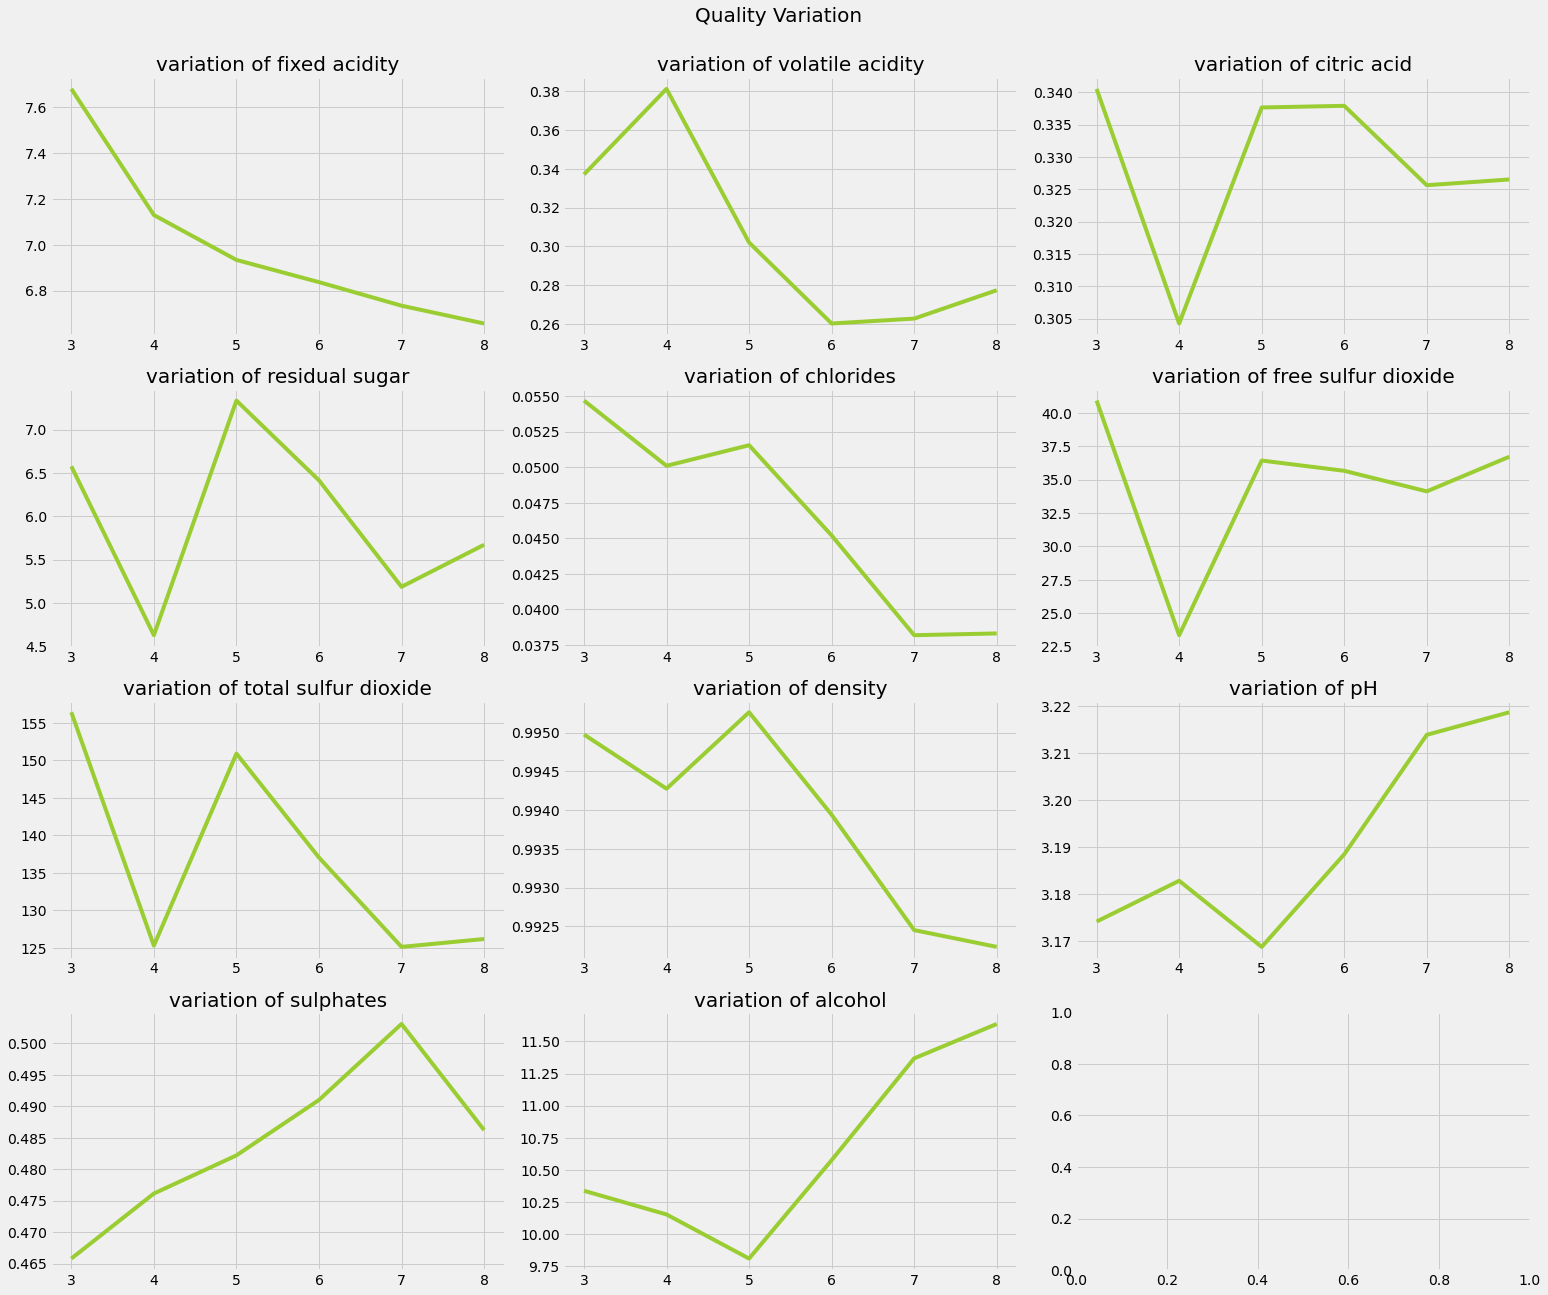

In [26]:
qual=np.arange(3,9,1)

k=1
fig_quality,axes=plt.subplots(nrows=4, ncols=3,figsize=(18, 15))
fig_quality.suptitle('Quality Variation',fontsize=20, x=0.6, y=1.2)
for col in df_wine.columns:
    if col != 'quality':
        arr=[]
        for i in qual:
            xx=df_wine[df_wine['quality']==i]
            arr.append(np.mean(xx[col]))   
        plt.subplot(4,3,k)
        plt.plot(qual,arr,color='yellowgreen')
        plt.title('variation of '+col,fontsize=20)
        k+=1
        
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.show()

A couple of findings from the plots above: 
- fixed acidity seems to have a inverse linear relationship with quality of the wine with a negative linear gradient 
- chlorides and density follow similar trends with quality 
- alcohol and pH follow similar trends with quality 
- residual sugar, total sulfur dioxide, citric acid, free sulfur dioxide follow similar trends with quality 

Further investigation on feature importance on the interested output will be provided. 

#### 1.3.2 Feature vs Feature

As there are similar trend demonstrated among different features, let's take a look at the correlation of features among each other to confirm the above findings. 

First, let's check the linear correlation among the features. 

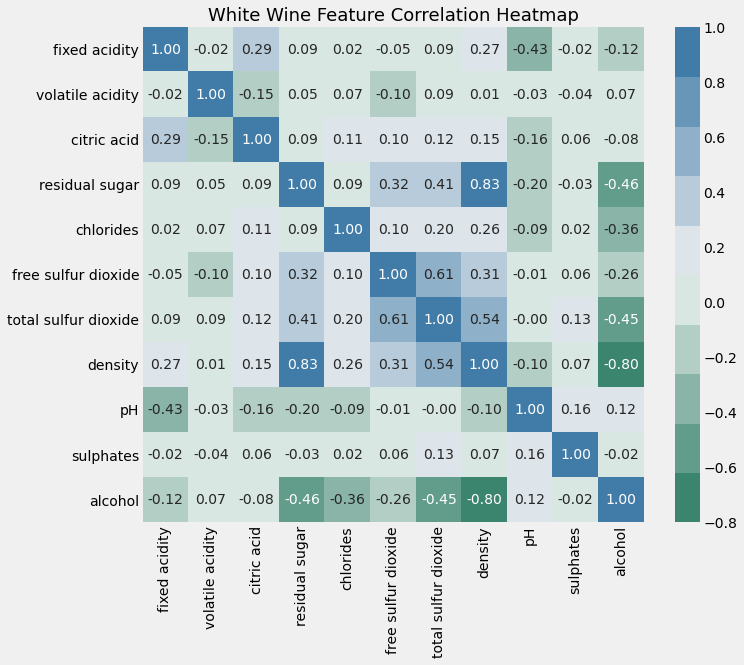

In [27]:
fig, ax = plt.subplots(figsize=(10, 8))
corr = df_wine.drop(columns='quality').corr()
heatmap = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap=sns.diverging_palette(160,240,n=10),fmt='.2f')
fig.subplots_adjust(top=0.93)
font = {
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }
ax.set_title('White Wine Feature Correlation Heatmap',fontdict = font);

From the correlation heatmap above,
- Density and residual sugar are highly correlated positively and linearly (0.83)
- Density and alcohol are highly linearly correlated negatively (-0.8)
- Total sulfur dioxide and free sulfur dioxide are somewhat positively linearly correlated (0.61)

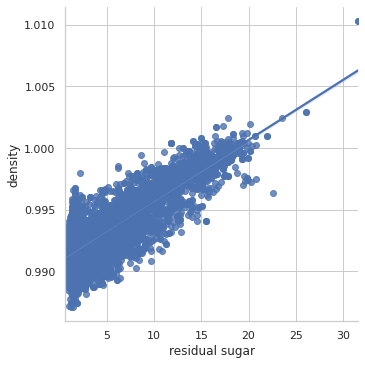

In [28]:
sns.set(style='whitegrid')
sns.lmplot(x='residual sugar',y='density',data = df_wine)

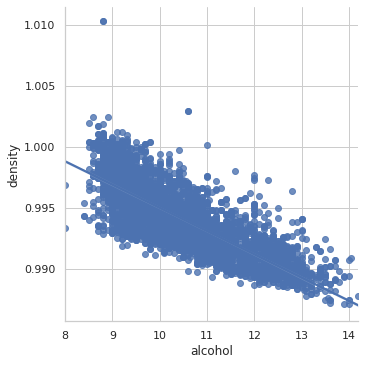

In [29]:
sns.lmplot(x='alcohol',y='density',data = df_wine)

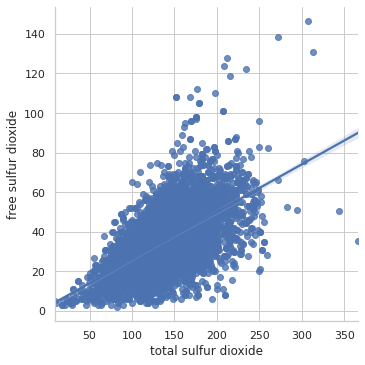

In [30]:
sns.lmplot(x='total sulfur dioxide',y='free sulfur dioxide',data = df_wine)

Density demonstrated high co-linearity with alcohol and sugar (|x|>0.8). Density is currently being considered to be excluded from the model. As mentioned in the dataset background info: 

*"**density**: the density of water is close to that of water depending on the percent alcohol and sugar content"*

Therefore, a decision on excluding density is made for the model. 

Next, let's check free sulfur dioxide with total sulfur dioxide relationship. 

*"6 - **free sulfur dioxide**: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7 - **total sulfur dioxide**: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine"*

At a quick glance, it would seem to be making good sense to exclude free sulfur dioxide and keep the total sulfur dioxide as the total sulfur dioxide. However, after checking this article "Total Sulfur Dioxide - WHy It Matters, Too!" [2], it appears that TSO2 in conjuction with FSO2 can provide a holistic sense of how "clean" a wine is. 

- Measuring the TSO2 will tell you weather all the SO2 you think is in the wine is actually there
- A wine with high TSO2 has usually had many SO2 additions made over its lifetime, usually because the FSO2 keeps dropping 
- When we see a wine where the FSO2 is an unusally small percentage of the TSO2, it's often an indication that there's something making the wine chemically and / or microbially unstatble. 
- TSO2 can act as a sort of "cushion" for FSO2 - when FSO2 is lost, the chemical equilibrium in the wine can shift so that some of the bound SO2 may be released to its free state. 

After getting some sort of idea the meaning of FSO2 and TSO2, I am inclined to convert TSO2 to a %FSO2 of TSO2 feature. However, if we were to pass these data to a deep learning model (NN),this relationship should be extracted by the algorithm. The need of feature engineering for deep learning model would be an interesting study to undertake. Nevertheless, including more features (especially unncessary ones) would increase the cost of computation. To keep or to update TSO2 or not, that is the question. 

Referring back to the quality vs. TSO2 and quality FSO2 plots in 1.3.1, it would seem that TSO2 and FSO2 have the opposite influences on the wine quality, so a decision to keep TSO2 is made here without digging into more information on sulphates and wine quality rabbit hole.


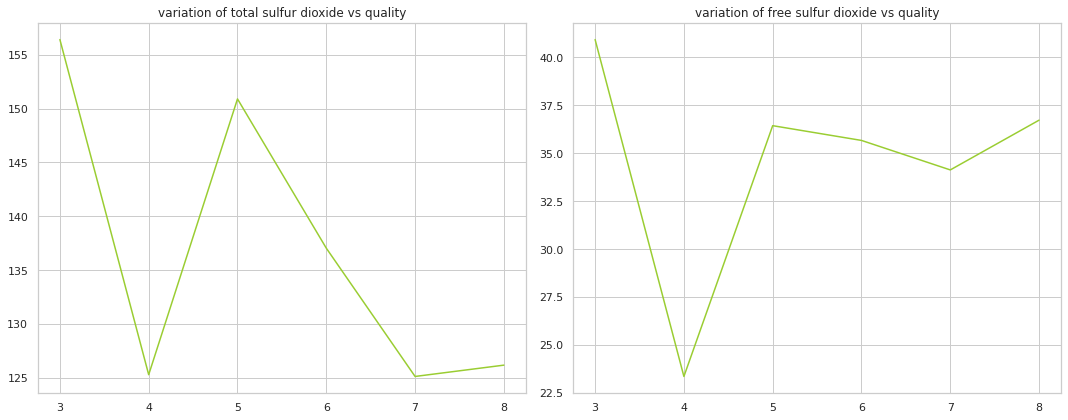

In [31]:
fig = plt.figure(figsize=(15, 6))

ax1 = plt.subplot(1,2,1,frameon=True)
col ='total sulfur dioxide'
arr=[]
for i in qual:
    xx=df_wine[df_wine['quality']==i]
    arr.append(np.mean(xx[col]))   
ax1.plot(qual,arr,color='yellowgreen')
ax1.set_title('variation of '+col +' vs quality')

ax2 = plt.subplot(1,2,2,frameon=True)
col ='free sulfur dioxide'
arr=[]
for i in qual:
    xx=df_wine[df_wine['quality']==i]
    arr.append(np.mean(xx[col]))   
ax2.plot(qual,arr,color='yellowgreen')
ax2.set_title('variation of '+col+' vs quality')

fig.tight_layout()
        


One thing to note is that when we use corr(), we are looking at Pearson's correlation values which evaluate only linear dependency between a pair of variables. How can we evaluate other types of correlations such as nonlinear and monotonic? 

Stumbled across this concept of distance correlation: 

*"Distance correlation bears some resemblance to Pearson’s r, but is actually calculated using a rather different notion of covariance. The method works by replacing our everyday concepts of covariance and standard deviation (as defined above) with “distance” analogues.*

*Much like Pearson’s r, “distance correlation” is defined as the “distance covariance” normalized by the “distance standard deviation”.*

*Instead of assessing how two variables tend to co-vary in their distance from their respective means, distance correlation assesses how they tend to co-vary in terms of their distances from all other points.*

*This opens up the potential to better capture non-linear dependencies between variables.*

*The distance correlation between any two variables is bound between zero and one. Zero implies the variables are independent, whereas a score closer to one indicates a dependent relationship."* [3]


In [32]:
from scipy.spatial.distance import pdist, squareform
import numpy as np

def distcorr(X, Y):
    """ Compute the distance correlation function
    https://gist.githubusercontent.com/satra/aa3d19a12b74e9ab7941/raw/d032100b72a8a5698ee3eda9b03b94b033c28999/distcorr.py
    >>> a = [1,2,3,4,5]
    >>> b = np.array([1,2,9,4,4])
    >>> distcorr(a, b)
    0.762676242417
    """
    X = np.atleast_1d(X)
    Y = np.atleast_1d(Y)
    if np.prod(X.shape) == len(X):
        X = X[:, None]
    if np.prod(Y.shape) == len(Y):
        Y = Y[:, None]
    X = np.atleast_2d(X)
    Y = np.atleast_2d(Y)
    n = X.shape[0]
    if Y.shape[0] != X.shape[0]:
        raise ValueError('Number of samples must match')
    a = squareform(pdist(X))
    b = squareform(pdist(Y))
    A = a - a.mean(axis=0)[None, :] - a.mean(axis=1)[:, None] + a.mean()
    B = b - b.mean(axis=0)[None, :] - b.mean(axis=1)[:, None] + b.mean()
    
    dcov2_xy = (A * B).sum()/float(n * n)
    dcov2_xx = (A * A).sum()/float(n * n)
    dcov2_yy = (B * B).sum()/float(n * n)
    dcor = np.sqrt(dcov2_xy)/np.sqrt(np.sqrt(dcov2_xx) * np.sqrt(dcov2_yy))
    return dcor

In [33]:
distcorr(df_wine['alcohol'],df_wine['density'])

0.7858824674688922

In [34]:
distcorr_matrix = []
for col in df_wine.columns:
    distcorr_col = []
    for col2 in df_wine.columns:
        col_col2 = distcorr(df_wine[col],df_wine[col2])
        distcorr_col.append(col_col2)
    distcorr_matrix.append(distcorr_col)
        
distcorr_matrix

[[1.0,
  0.05332478229208622,
  0.27300060387076647,
  0.1339423973457045,
  0.10691984431055289,
  0.07899243408387528,
  0.1261081824517941,
  0.24845993840959524,
  0.3912938219900736,
  0.04811312427610384,
  0.12059867286590643,
  0.08837053537389264],
 [0.05332478229208622,
  1.0,
  0.1960130839053917,
  0.1078178441915,
  0.0805839793367433,
  0.11366505403157211,
  0.12623494555581935,
  0.05986613136867779,
  0.08026158849402998,
  0.05507764000845175,
  0.12789733353614027,
  0.20214163506718102],
 [0.27300060387076647,
  0.1960130839053917,
  1.0,
  0.09855722059378577,
  0.12066084426258651,
  0.11508374945422163,
  0.12731372009173178,
  0.155299316923313,
  0.16148369446881758,
  0.08309604927317699,
  0.1529803796766798,
  0.1457727415828954],
 [0.1339423973457045,
  0.1078178441915,
  0.09855722059378577,
  1.0,
  0.22307884898755084,
  0.3433377407696368,
  0.4137274068925993,
  0.8169653408676156,
  0.19937091529593098,
  0.06976104083576153,
  0.46626905222612225,
  

In [35]:
df = pd.DataFrame (distcorr_matrix,columns=list(df_wine.columns))
df[''] = list(df_wine.columns)
df = df.set_index('')

In [36]:
import seaborn as sns

cm = sns.light_palette("#2ecc71", as_cmap=True)
distance_corr_heatmap = df.style.background_gradient(cmap=cm).format("{:.2}").set_caption("Distance Correlation Matrix").set_table_styles([{'selector': 'caption','props': [('color', 'Black'),('font-size', '15px')]}])
distance_corr_heatmap

From the above correlation heatmap, we can see it demonstrates a similar correlation pattern as pearson's correlation coefficient heatmap. 
A more comprehensive and robust study on the correlation among the features would be interesting to further examine their relationship. 

## 2. Feature Engineering 

After getting some insights from the correlation analysis, we have made a decision to drop density. Let's start with that. 

In [37]:
df_wine.drop('density',inplace=True,axis=1)
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

### 2.1 Output Binarization 

Sometimes I don't really care about the detailed wine quality. I just would like to know if it's good or bad before taking a blindly trusting sip when caught in the moment. However, I do have a high standard. Therefore, the wine quality data is split into good wine and bad wine by using 7 as the threshold:
- good wine: 7-9
- bad wine: 1-6

As discussed before, there exists an imbalance between different quality scores of wine. By using 7 as the bin threshold, it would create an even greater imbalance distribution between good and bad wine classes. 

In [38]:
# set up binary classification class of wine quality 
#y = df_wine.pop('quality')
df_wine['quality'] = df_wine['quality'].apply(lambda x: 0 if x <= 6 else 1)

In [39]:
df_wine['quality'].value_counts()

0    3836
1    1060
Name: quality, dtype: int64

In [40]:
# % of good wine class
sum(df_wine['quality'])/len(df_wine['quality'])

0.21650326797385622

We can see that we have 21.6% of good wine and 78.4% of bad wine in the dataset. However, one can not lower one's standard for the mere challenge of imbalance datasets especially when it's not even an extreme case such as 92% vs 8%. One must drink good wine. The effect of imbalanced dataset would not be too significant but here are a couple strategies to handle an imbalanced datasets [4]: 
- collect more data (not possible but would be an interesting daily data collection exercise during the next two years)
- generate synthetic data: popular algorithm SMOTE (synthetic minority over-sampling technique) varies attributes of the observations to create new synthetic samples 
- experiment with different algorithms: decision trees seem to perform well with imbalanced datasets. Penalizing learning models uses a cost penalization for making classification mistakes on the minority class during training, therefore, forcing the model to pay more attention to the minority class observations. For binary classification extreme cases, anomaly detection models could be considered rather than using a traditional classification models.
- re-sample the dataset (either under-sampling the majority class or over-sampling the minority class)


As setting up penalty matrix can be rather complex, it is not considered in this assignment. As we didn't have overwhelmingly number of data for the majority class, under-sampling of the majority class is not considered to ensure that we have enough information for the model to train and learn. For this assignment,  oversampling the minority class with synthetic samples and experimenting different algorithms including decision trees is considered. 

__Note to myself: do train/test split before generating synthetic samples- as we want to validate and test the model on original data__

One thing to note when evaluating the performance of a model with imbalanced dataset is to use the right performance metric. If the model just blindly classify all the wine as bad wine, it would achieve an accuracy of 78.4%. Not amazing but still quite high. Aside from balancing the minority class, we are using more than accuracy for model evaluations : 
- accuracy 
- precision
- recall 
- F1 score
- Confusion Matrix 
- ROC AUC score 

### 2.2 Feature Scaling 

As mentioned before, there are different ranges among the feature values:


In [41]:
df_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4896.000000       4896.000000  4896.000000     4896.000000   
mean        6.854749          0.278105     0.334154        6.379994   
std         0.843864          0.100336     0.120979        5.001264   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       31.600000   

         chlorides  free sulfur dioxide  total sulfur dioxide           pH  \
count  4896.000000          4896.000000           4896.000000  4896.000000   
mean      0.045766            35.261846            138.294628     3.188174   
std       0.021849            16.615005             42.286355     0.150961   
min       0.009000             2.000000              9.000000     2.720000   
25%       0.036000            23.000000            108.000000     3.090000   
50%       0.043000            34.000000            134.000000     3.180000   
75%       0.050000            46.000000            167.000000     3.280000   
max       0.346000           146.500000            366.500000     3.820000   

         sulphates      alcohol      quality  
count  4896.000000  4896.000000  4896.000000  
mean      0.489775    10.514028     0.216503  
std       0.114093     1.230755     0.411903  
min       0.220000     8.000000     0.000000  
25%       0.410000     9.500000     0.000000  
50%       0.470000    10.400000     0.000000  
75%       0.550000    11.400000     0.000000  
max       1.080000    14.200000     1.000000

Feature scaling can significantly improve the performance of some ML algorithm. 

For gradient descent based algorithm (linear regression, NN), the difference in ranges of features will cause different step sizes for each feature. It can help the gradient descent converge more quickly towards the minima with features on a similar scale. For distance based algorithms (K-Nearest Neighours, SVM), the range of features affect the algorithms significantly as they are using distances between data points to determine their similarity.Tree-based algorithm, however, is invariant to the scale of features as the splitting of the nods in a decision tree is based on a single feature. [5]

There are two techniques to scale data: normalization and standardization. Normalization (min-max scaling) shifts values and rescale them to values between 0 and 1. Standardization centres the feature values around the mean of value 0 with a unit standard deviation of 1. The final values of standardization are in the range of -3 to 3. [5]

As shown in the feature distribution plots in section 1.1, the feature data follows a Guassian distribution. Standardization is better for this scenario and it is not largely affected by outlier values.

The scaling of testing data and training data is done separately to prevent information from the test set from being passed to  the training data, causing a data leak.

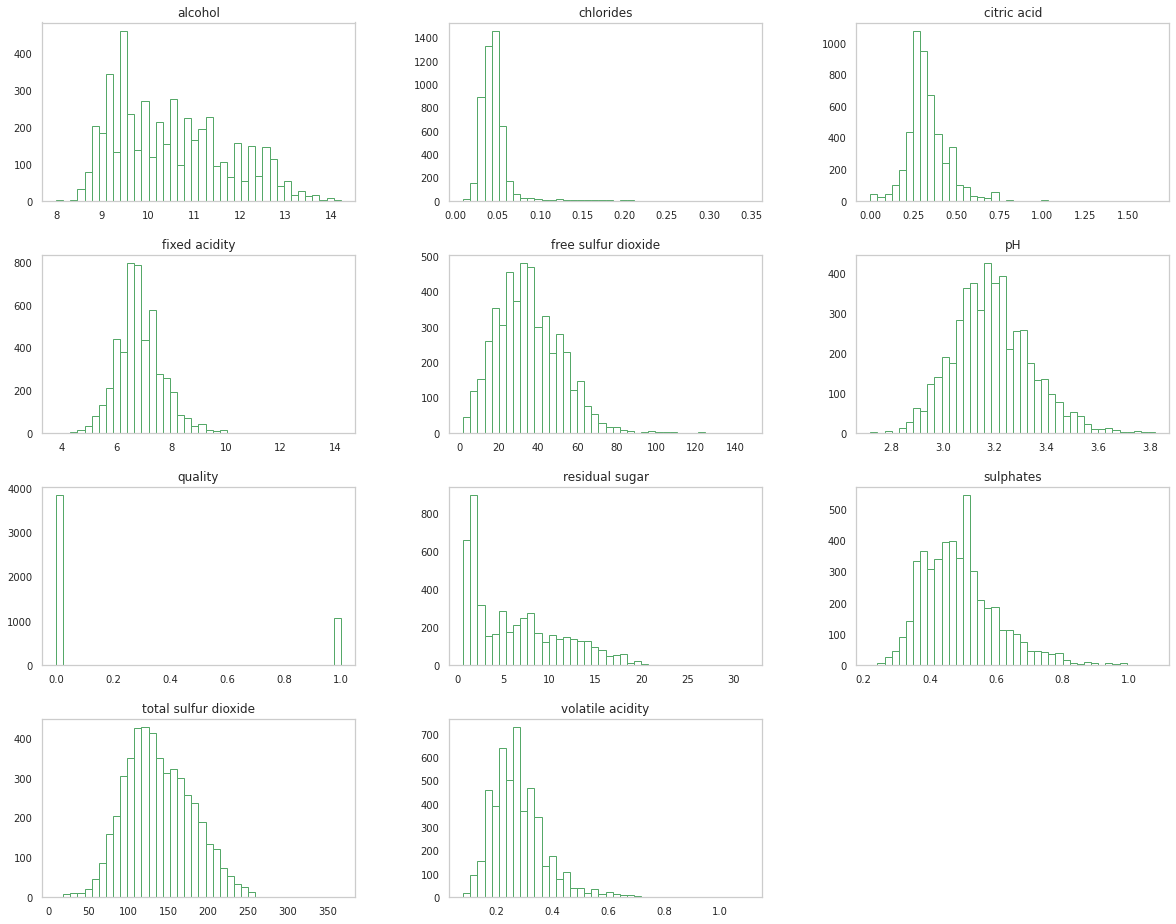

In [42]:
# check the distribution of features 
df_wine.hist(bins=40, edgecolor='g', linewidth=1.0,
                          xlabelsize=10, ylabelsize=10, grid=False, 
                          figsize=(18,15), color='white');

### 2.3 Data Split Test/Train, and Execution of Data Shuffling, Feature Scaling and SMOTE Syntehtic Data Generation

Before split data into testing and training, the data is shuffled to make sure the data is not ordered in any particular pattern. 

In [43]:
df_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide    pH  sulphates  alcohol  \
0                 45.0                 170.0  3.00       0.45      8.8   
1                 14.0                 132.0  3.30       0.49      9.5   
2                 30.0                  97.0  3.26       0.44     10.1   
3                 47.0                 186.0  3.19       0.40      9.9   
4                 47.0                 186.0  3.19       0.40      9.9   

   quality  
0        0  
1        0  
2        0  
3        0  
4        0

In [44]:
df_wine = df_wine.sample(frac=1,random_state = 4).reset_index(drop=True)
df_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            5.9              0.26         0.24            2.40      0.046   
1            6.6              0.33         0.24           16.05      0.045   
2            7.0              0.16         0.25           14.30      0.044   
3            6.6              0.30         0.25            8.00      0.036   
4            6.1              0.25         0.48           15.80      0.052   

   free sulfur dioxide  total sulfur dioxide    pH  sulphates  alcohol  \
0                 27.0                 132.0  3.63       0.73     11.3   
1                 31.0                 147.0  3.08       0.52      9.2   
2                 27.0                 149.0  2.91       0.46      9.2   
3                 21.0                 124.0  3.06       0.38     10.8   
4                 25.0                  94.0  3.07       0.45      9.2   

   quality  
0        0  
1        0  
2        0  
3        0  
4        0

In [45]:
# test/train split 
y = df_wine.pop('quality')
X_train, X_test, y_train, y_test = train_test_split(df_wine, y, test_size=0.3, random_state=23)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((3427, 10), (1469, 10), (3427,), (1469,))

In [46]:
X_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2389            5.8              0.58         0.00             1.5      0.020   
3904            6.5              0.41         0.64            11.8      0.065   
2365            9.2              0.28         0.49            11.8      0.042   
306             7.9              0.17         0.32             1.6      0.053   
455             6.6              0.24         0.27            10.3      0.047   

      free sulfur dioxide  total sulfur dioxide    pH  sulphates  alcohol  
2389                 33.0                  96.0  3.29       0.38     12.4  
3904                 65.0                 225.0  3.12       0.51      8.9  
2365                 29.0                 137.0  3.10       0.34     10.1  
306                  47.0                 150.0  3.29       0.76      9.6  
455                  54.0                 219.0  3.04       0.45      8.8

In [47]:
# feature scaling: fit on training and testing dataset seperately 
from sklearn.preprocessing import StandardScaler
for col in X_train.columns:
    scaler = StandardScaler()
    X_train[col] = scaler.fit_transform(X_train[[col]])
    X_test[col] = scaler.fit_transform(X_test[[col]])


In [48]:
X_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2389      -1.216436          3.088081    -2.768219       -0.967424  -1.188053   
3904      -0.404825          1.357234     2.563767        1.090485   0.888986   
2365       2.725677          0.033646     1.314083        1.090485  -0.172612   
306        1.218399         -1.086313    -0.102226       -0.947444   0.335109   
455       -0.288880         -0.373612    -0.518787        0.790790   0.058170   

      free sulfur dioxide  total sulfur dioxide        pH  sulphates   alcohol  
2389            -0.128595             -1.007211  0.688394  -0.959675  1.524378  
3904             1.805079              2.057367 -0.444040   0.188497 -1.316693  
2365            -0.370305             -0.033198 -0.577267  -1.312958 -0.342612  
306              0.717387              0.275635  0.688394   2.396519 -0.748479  
455              1.140379              1.914828 -0.976950  -0.341428 -1.397867

"Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space." [6]

In [49]:
# for SMOTE visualization 
# pip install imblearn

def visualization_SMOTE(k,X_train, y_train):
    plt.title('Original Imbalanced dataset')
    plt.xlabel('fixed acidity')
    plt.ylabel('chlorides')
    plt.scatter(X_train['fixed acidity'],X_train['chlorides'],c=y_train, marker='o',s=25, edgecolor='w', cmap=plt.get_cmap('coolwarm'))
    plt.show()
    
    #SMOTE 
    from imblearn.over_sampling import SMOTE
    sm = SMOTE(sampling_strategy='auto', random_state=44, k_neighbors=k)
    X_train_SMOTE, y_train_SMOTE = sm.fit_sample(X_train, y_train)
    plt.title('Balanced dataset with SMOTE ' + str(k) +' Nearest Neighbours')
    plt.xlabel('fixed acidity')
    plt.ylabel('chlorides')
    plt.scatter(X_train_SMOTE['fixed acidity'],X_train_SMOTE['chlorides'],c=y_train_SMOTE, marker='o',s=25, edgecolor='w', cmap=plt.get_cmap('coolwarm'))
    plt.show()
    
    return X_train_SMOTE, y_train_SMOTE


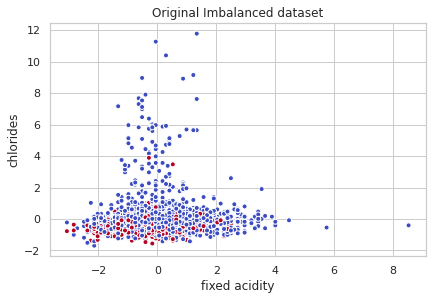

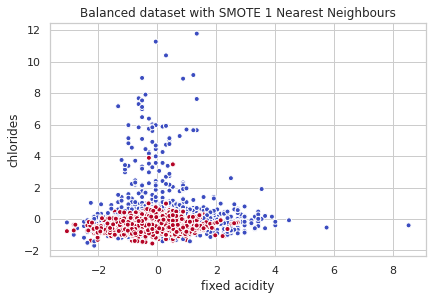

In [50]:
X_train_SMOTE,y_train_SMOTE = visualization_SMOTE(1,X_train, y_train);

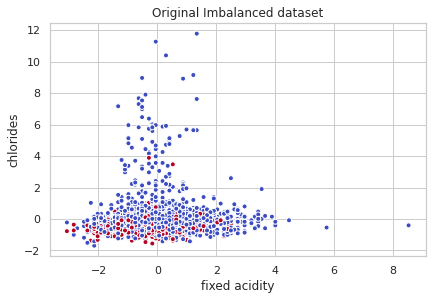

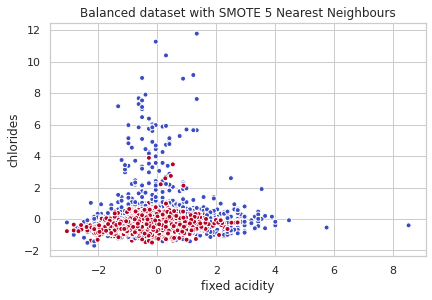

In [51]:
X_train_SMOTE,y_train_SMOTE = visualization_SMOTE(5,X_train, y_train);

I don't see a huge difference between k = 1 and 5. Balanced dataset of X_train_SMOTE, y_train_SMOTE with 5 nearest neighbours will be used for the model.  

## 3. Model Fitting and Training  

Training data, testing data for both feature and interested output have been prepared. This section included the typical model training and evaluation processes of shallow learning models (Logistic Regression, Decision Tree, Random Forest,XGBoost,Support Vector Machine & KNN) and deep learning models (Neural Network). 

- Logistic Regression is chosen as an example of regression model for classification. 
- Decision tree is chosen to study as the base for other tree-based algorithms: random forest and XGBoost. Random Forest is chosen as an example of ensemble learning with bagging (combining the results of multiple models to get a generalized results by developing those models on subsets of the data), whereas XGBoost is chosen as an example of ensemble learning with boosting (sequential process, each subsequent model attempts to correct the errors of the previous model). 
- SVM and KNN are chosen as they are widely-used for classification tasks. 
- Neural network is chosen to study as it makes up the backbone of deep learning algorithms. 

Some recommendations would be made for the model selection for the wine dataset. In addition, rather than finding the best model, we could also bundle up all of those models tried together and use max voting criteria as our final prediciton (ensemble learning). 

In [52]:
# double check the shape of training and testing dataset
X_train_SMOTE.shape, y_train_SMOTE.shape, X_test.shape, y_test.shape

((5392, 10), (5392,), (1469, 10), (1469,))

### 3.1 Shallow Learning Models 

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


Since we have balanced the datasets. We can do a quick run through and comparison of all the shallow learning models before hyperparameter tuning each individual model for a higher model prediction performance. Precision, recall, f-score, and confusion matrix are used for model evaluation. F1 score conveys the balance between the precision and the recall. It is usually used as a metric to evaluate how well a model performs. The higher the better. 

AUC Curve, a visual estimation with false positive rate and true positive rate, is plotted for each classifier. 

An receiver operating characteristic (ROC) curve is a graph demonstrating the performance of a classification model at all classification thresholds. The curve involves two parameters: true positive rate and false positive rate.  The area under the ROC curve measures the entire area underneath the ROC curve from (0,0) to (1,0). The AUC score takes values from 0 to 1, where a value of 0 indicates perfectly inaccurate test and 1 indicates a perfectly accurate test. In general, an AUC of 0.5 suggests no discrimination, 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is regarded as outstanding for a model. [7]

In [54]:
def model_evaluation(test, prediction, output=None):
    print('Accuracy:', np.round(metrics.accuracy_score(test, prediction), 4)) 
    print('-'*60)
    print('classification report:\n\n', metrics.classification_report(y_true=test, y_pred=prediction, target_names=output)) 
    #support - number of class occurances in the dataset 
    
    classes = [0, 1]
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=test, y_pred=prediction, labels=classes)
    cm_frame = pd.DataFrame(data=cm, columns=pd.MultiIndex(levels=[['Predicted:'], classes], labels=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], labels=level_labels))
    
    print('-'*60)
    print('Confusion matrix:\n')
    print(cm_frame) 

Logistic Regression
Accuracy: 0.725
------------------------------------------------------------
classification report:

               precision    recall  f1-score   support

    Bad Wine       0.91      0.72      0.80      1140
   Good Wine       0.43      0.76      0.55       329

    accuracy                           0.72      1469
   macro avg       0.67      0.74      0.68      1469
weighted avg       0.80      0.72      0.75      1469

------------------------------------------------------------
Confusion matrix:

          Predicted:     
                   0    1
Actual: 0        816  324
        1         80  249


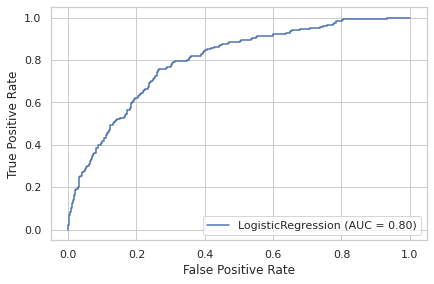



Decision Tree
Accuracy: 0.7597
------------------------------------------------------------
classification report:

               precision    recall  f1-score   support

    Bad Wine       0.90      0.77      0.83      1140
   Good Wine       0.48      0.71      0.57       329

    accuracy                           0.76      1469
   macro avg       0.69      0.74      0.70      1469
weighted avg       0.81      0.76      0.77      1469

------------------------------------------------------------
Confusion matrix:

          Predicted:     
                   0    1
Actual: 0        883  257
        1         96  233


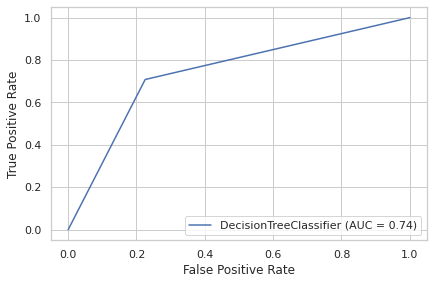



Random Forest Classifier
Accuracy: 0.8462
------------------------------------------------------------
classification report:

               precision    recall  f1-score   support

    Bad Wine       0.92      0.88      0.90      1140
   Good Wine       0.63      0.74      0.68       329

    accuracy                           0.85      1469
   macro avg       0.78      0.81      0.79      1469
weighted avg       0.86      0.85      0.85      1469

------------------------------------------------------------
Confusion matrix:

          Predicted:     
                   0    1
Actual: 0        999  141
        1         85  244


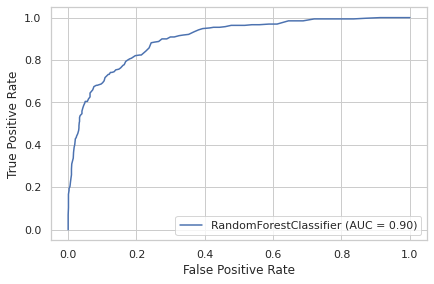



XGBoost
Accuracy: 0.7018
------------------------------------------------------------
classification report:

               precision    recall  f1-score   support

    Bad Wine       0.95      0.65      0.77      1140
   Good Wine       0.42      0.87      0.57       329

    accuracy                           0.70      1469
   macro avg       0.68      0.76      0.67      1469
weighted avg       0.83      0.70      0.73      1469

------------------------------------------------------------
Confusion matrix:

          Predicted:     
                   0    1
Actual: 0        745  395
        1         43  286


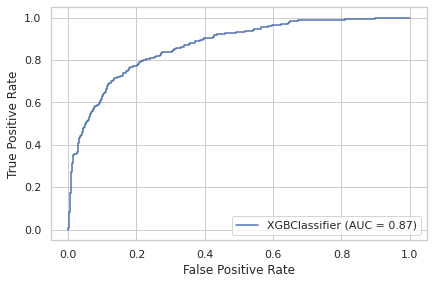



Linear SVM
Accuracy: 0.7263
------------------------------------------------------------
classification report:

               precision    recall  f1-score   support

    Bad Wine       0.91      0.72      0.80      1140
   Good Wine       0.44      0.76      0.55       329

    accuracy                           0.73      1469
   macro avg       0.67      0.74      0.68      1469
weighted avg       0.81      0.73      0.75      1469

------------------------------------------------------------
Confusion matrix:

          Predicted:     
                   0    1
Actual: 0        817  323
        1         79  250


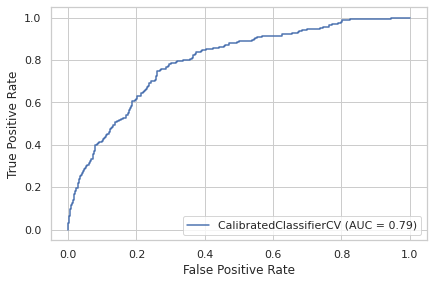



rbf SVM
Accuracy: 0.7869
------------------------------------------------------------
classification report:

               precision    recall  f1-score   support

    Bad Wine       0.92      0.80      0.85      1140
   Good Wine       0.52      0.74      0.61       329

    accuracy                           0.79      1469
   macro avg       0.72      0.77      0.73      1469
weighted avg       0.83      0.79      0.80      1469

------------------------------------------------------------
Confusion matrix:

          Predicted:     
                   0    1
Actual: 0        911  229
        1         84  245


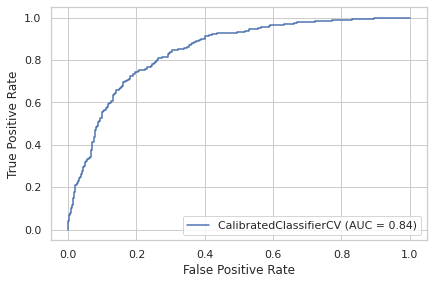



poly SVM
Accuracy: 0.7413
------------------------------------------------------------
classification report:

               precision    recall  f1-score   support

    Bad Wine       0.90      0.75      0.82      1140
   Good Wine       0.45      0.71      0.55       329

    accuracy                           0.74      1469
   macro avg       0.67      0.73      0.68      1469
weighted avg       0.80      0.74      0.76      1469

------------------------------------------------------------
Confusion matrix:

          Predicted:     
                   0    1
Actual: 0        856  284
        1         96  233


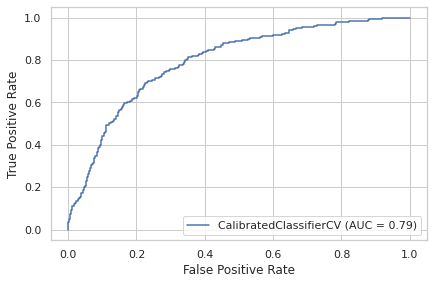



K Nearest Neighbors
Accuracy: 0.7903
------------------------------------------------------------
classification report:

               precision    recall  f1-score   support

    Bad Wine       0.92      0.80      0.86      1140
   Good Wine       0.52      0.77      0.62       329

    accuracy                           0.79      1469
   macro avg       0.72      0.78      0.74      1469
weighted avg       0.83      0.79      0.80      1469

------------------------------------------------------------
Confusion matrix:

          Predicted:     
                   0    1
Actual: 0        909  231
        1         77  252


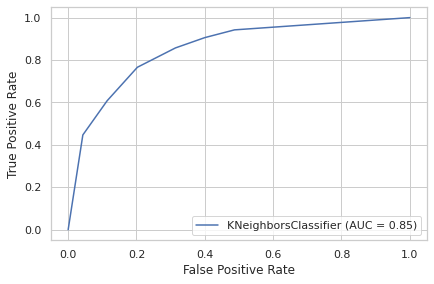

Model Algorithm  Accuracy  ROC AUC score  \
2  Random Forest Classifier  0.846154       0.899273   
7       K Nearest Neighbors  0.790334       0.852700   
5                   rbf SVM  0.786930       0.844057   
1             Decision Tree  0.759700       0.741384   
6                  poly SVM  0.741321       0.793902   
4                Linear SVM  0.726344       0.794396   
0       Logistic Regression  0.724983       0.796222   
3                   XGBoost  0.701838       0.868530   

   Good Wine Prediction F1 Score  Run Time (ms)  
2                       0.850250           1359  
7                       0.802622            482  
5                       0.798932           4530  
1                       0.774191            238  
6                       0.758440           3721  
4                       0.746960           1844  
0                       0.745701            203  
3                       0.726577            792

In [55]:
from sklearn.calibration import CalibratedClassifierCV
models=[LogisticRegression(),
        DecisionTreeClassifier(),
        RandomForestClassifier(random_state=4),
        xgboost.XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1),
        CalibratedClassifierCV(LinearSVC()),
        CalibratedClassifierCV(SVC(kernel='rbf')),
        CalibratedClassifierCV(SVC(kernel='poly')),
        KNeighborsClassifier(n_neighbors=6),
        ]
model_names=['Logistic Regression',
             'Decision Tree',
             'Random Forest Classifier',
             'XGBoost',
             'Linear SVM',
             'rbf SVM',
             'poly SVM',
             'K Nearest Neighbors',
            ]

accuracy=[]
run_time=[]
ROC_auc_score=[]
f1=[]

class style:
   BOLD = '\033[1m'
   END = '\033[0m'

import time
for model in range(len(models)):
    print(style.BOLD + model_names[model]+style.END)
    start_time = time.time()
     
    clf=models[model]
    clf.fit(X_train_SMOTE,y_train_SMOTE)
    pred=clf.predict(X_test)
    accuracy.append(accuracy_score(pred,y_test))
    model_evaluation(y_test, pred, output=['Bad Wine', 'Good Wine'])
    
    #Plot ROC Curve 
    metrics.plot_roc_curve(clf,X_test, y_test)
    plt.show()
    probs = clf.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    ROC_auc_score.append(metrics.auc(fpr, tpr))
    f1.append(metrics.f1_score(y_test,pred,average='weighted'))
    
    #plt.title(model_names[model] + ' ROC Curve')
    #plt.plot(fpr, tpr, 'yellowgreen', label = 'ROC AUC score = %0.2f' % roc_auc)
    #plt.legend(loc = 'lower right')
    #plt.plot([0, 1], [0, 1],'b--',)
    #plt.xlim([0, 1])
    #plt.ylim([0, 1])
    #plt.ylabel('True Positive Rate',fontsize = 14)
    #plt.xlabel('False Positive Rate',fontsize = 14)
    #plt.show()
    
    current_time = time.time()
    elapsed_time = current_time - start_time
    run_time.append(int(round(elapsed_time * 1000)))
    print('\n')


summary_0 = pd.DataFrame({'Model Algorithm':model_names,'Accuracy':accuracy,'ROC AUC score':ROC_auc_score, 'Good Wine Prediction F1 Score':f1,'Run Time (ms)':run_time})
summary_0.sort_values(['Accuracy'],ascending=False)


From the quick run through of all the classifiers, it appears that Random Forest performs the best in both Accuracy and ROC AUC score. Cross validation and grid search are implemented to better estimate and improve the model performance. 

- Cross validations is to prevent overfitting and building a robust learning model. 
- Grid Search is to find the best hyper parameter for each individual model. 

#### __Cross Validation__

One way of using cross validation through Sklearn is to use cross_val_score(classifier, x, y, cv) directly.However, we need to scale train and test data seperately as well as generate synthetica minority class data for the testing dataset. Therefore, the following code is executed: 

(Checked sklearn make_pipeline but it looks like it can't really specify  dataset to use for each step) 


In [56]:
# K-fold Cross Validation
# since our data is shuffled, here we set shuffle to false 
from imblearn.over_sampling import SMOTE

# k = 10 is chosen 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
cv = KFold(n_splits = 10, random_state = 44, shuffle = False)

fold_index = 1
avg_accu_sum = pd.DataFrame({'Model Algorithm':model_names})

for train, test in cv.split(df_wine):
    
    # test, train split 
    X_train_cv = df_wine.iloc[train]
    y_train_cv = y.iloc[train]
    X_test_cv = df_wine.iloc[test]
    y_test_cv = y.iloc[test]
    
    # feature scaling: fit on training and testing dataset seperately 
    for col in X_train_cv.columns:
        scaler = StandardScaler()
        X_train_cv[col] = scaler.fit_transform(X_train_cv[[col]])
        X_test_cv[col] = scaler.fit_transform(X_test_cv[[col]])

    # SMOTE on training data 
    sm = SMOTE(sampling_strategy='auto', random_state=44, k_neighbors=k)
    X_train_cv_SMOTE, y_train_cv_SMOTE = sm.fit_sample(X_train_cv, y_train_cv)
    
    # Run through models 
    accuracy=[]
    run_time=[]
    ROC_auc_score=[]
    f1=[]

    for model in range(len(models)):
        start_time = time.time()

        clf=models[model]
        clf.fit(X_train_cv_SMOTE,y_train_cv_SMOTE)
        pred=clf.predict(X_test_cv)
        accuracy.append(accuracy_score(pred,y_test_cv))
        #model_evaluation(y_test_cv, pred, output=['Bad Wine', 'Good Wine'])

        #Plot ROC Curve 
        #metrics.plot_roc_curve(clf,X_test_cv, y_test_cv)
        #plt.show()
        probs = clf.predict_proba(X_test_cv)
        preds = probs[:,1]
        fpr, tpr, threshold = metrics.roc_curve(y_test_cv, preds)
        ROC_auc_score.append(metrics.auc(fpr, tpr))
        f1.append(metrics.f1_score(y_test_cv,pred,average='weighted'))

        #plt.title(model_names[model] + ' ROC Curve')
        #plt.plot(fpr, tpr, 'yellowgreen', label = 'ROC AUC score = %0.2f' % roc_auc)
        #plt.legend(loc = 'lower right')
        #plt.plot([0, 1], [0, 1],'b--',)
        #plt.xlim([0, 1])
        #plt.ylim([0, 1])
        #plt.ylabel('True Positive Rate',fontsize = 14)
        #plt.xlabel('False Positive Rate',fontsize = 14)
        #plt.show()

        current_time = time.time()
        elapsed_time = current_time - start_time
        run_time.append(int(round(elapsed_time * 1000)))
        
        

    print(style.BOLD,'K fold #',fold_index ,style.END)
    summary = pd.DataFrame({'Model Algorithm':model_names,'Accuracy':accuracy,'ROC AUC score':ROC_auc_score, 'Good Wine Prediction F1 Score':f1,'Run Time (ms)':run_time})
    summary.sort_values(['Accuracy'],ascending=False,inplace=True)
    display(summary.head(3))
    
    #for average accuracy computation 
    col_name = 'Accuracy of K Fold #' + str(fold_index)
    avg_accu_fold = pd.DataFrame({col_name:accuracy})
    avg_accu_sum = pd.concat([avg_accu_sum,avg_accu_fold],axis=1)
    print('\n')
    
    fold_index+= 1


 K fold # 1 


Model Algorithm  Accuracy  ROC AUC score  \
2  Random Forest Classifier  0.822449       0.907084   
7       K Nearest Neighbors  0.795918       0.839615   
5                   rbf SVM  0.761224       0.833051   

   Good Wine Prediction F1 Score  Run Time (ms)  
2                       0.830250           1465  
7                       0.808627             92  
5                       0.776667           4676



 K fold # 2 


Model Algorithm  Accuracy  ROC AUC score  \
2  Random Forest Classifier  0.848980       0.923848   
7       K Nearest Neighbors  0.800000       0.875930   
5                   rbf SVM  0.783673       0.866286   

   Good Wine Prediction F1 Score  Run Time (ms)  
2                       0.855335           1444  
7                       0.812226             93  
5                       0.796257           4685



 K fold # 3 


Model Algorithm  Accuracy  ROC AUC score  \
2  Random Forest Classifier  0.828571       0.867597   
7       K Nearest Neighbors  0.783673       0.835475   
1             Decision Tree  0.767347       0.721394   

   Good Wine Prediction F1 Score  Run Time (ms)  
2                       0.837188           1435  
7                       0.798693             94  
1                       0.782619             70



 K fold # 4 


Model Algorithm  Accuracy  ROC AUC score  \
2  Random Forest Classifier  0.861224       0.920397   
5                   rbf SVM  0.816327       0.882606   
7       K Nearest Neighbors  0.802041       0.878884   

   Good Wine Prediction F1 Score  Run Time (ms)  
2                       0.861224           1481  
5                       0.824940           4692  
7                       0.811481             93



 K fold # 5 


Model Algorithm  Accuracy  ROC AUC score  \
2  Random Forest Classifier  0.844898       0.908080   
5                   rbf SVM  0.787755       0.857068   
7       K Nearest Neighbors  0.787755       0.842164   

   Good Wine Prediction F1 Score  Run Time (ms)  
2                       0.850609           1455  
5                       0.800667           4588  
7                       0.798769             90



 K fold # 6 


Model Algorithm  Accuracy  ROC AUC score  \
2  Random Forest Classifier  0.836735       0.890565   
7       K Nearest Neighbors  0.779592       0.833308   
5                   rbf SVM  0.773469       0.819663   

   Good Wine Prediction F1 Score  Run Time (ms)  
2                       0.844656           1455  
7                       0.794415             91  
5                       0.790187           4500



 K fold # 7 


Model Algorithm  Accuracy  ROC AUC score  \
2  Random Forest Classifier  0.842536       0.906530   
7       K Nearest Neighbors  0.793456       0.866639   
5                   rbf SVM  0.783231       0.845476   

   Good Wine Prediction F1 Score  Run Time (ms)  
2                       0.848825           1471  
7                       0.805944             94  
5                       0.797438           4572



 K fold # 8 


Model Algorithm  Accuracy  ROC AUC score  \
2  Random Forest Classifier  0.850716       0.908257   
7       K Nearest Neighbors  0.817996       0.867624   
5                   rbf SVM  0.807771       0.851497   

   Good Wine Prediction F1 Score  Run Time (ms)  
2                       0.856518           1448  
7                       0.828425             93  
5                       0.818635           4674



 K fold # 9 


Model Algorithm  Accuracy  ROC AUC score  \
2  Random Forest Classifier  0.871166       0.933678   
7       K Nearest Neighbors  0.815951       0.871346   
5                   rbf SVM  0.801636       0.878553   

   Good Wine Prediction F1 Score  Run Time (ms)  
2                       0.876048           1468  
7                       0.826022             95  
5                       0.816250           4580



 K fold # 10 


Model Algorithm  Accuracy  ROC AUC score  \
2  Random Forest Classifier  0.867076       0.908042   
7       K Nearest Neighbors  0.832311       0.898077   
5                   rbf SVM  0.807771       0.860265   

   Good Wine Prediction F1 Score  Run Time (ms)  
2                       0.867761           1433  
7                       0.839480             90  
5                       0.819723           4601

In [57]:
avg_accu_sum['Average Accuracy'] = avg_accu_sum.mean(axis=1)
avg_accu_sum.sort_values(['Average Accuracy'],ascending=False,inplace=True)

In [58]:
avg_accu_sum

Model Algorithm  Accuracy of K Fold #1  Accuracy of K Fold #2  \
2  Random Forest Classifier               0.822449               0.848980   
7       K Nearest Neighbors               0.795918               0.800000   
5                   rbf SVM               0.761224               0.783673   
1             Decision Tree               0.759184               0.775510   
6                  poly SVM               0.757143               0.763265   
4                Linear SVM               0.714286               0.755102   
0       Logistic Regression               0.708163               0.753061   
3                   XGBoost               0.677551               0.708163   

   Accuracy of K Fold #3  Accuracy of K Fold #4  Accuracy of K Fold #5  \
2               0.828571               0.861224               0.844898   
7               0.783673               0.802041               0.787755   
5               0.757143               0.816327               0.787755   
1               0.767347               0.757143               0.773469   
6               0.724490               0.775510               0.742857   
4               0.722449               0.738776               0.691837   
0               0.718367               0.732653               0.693878   
3               0.689796               0.755102               0.687755   

   Accuracy of K Fold #6  Accuracy of K Fold #7  Accuracy of K Fold #8  \
2               0.836735               0.842536               0.850716   
7               0.779592               0.793456               0.817996   
5               0.773469               0.783231               0.807771   
1               0.734694               0.758691               0.775051   
6               0.736735               0.773006               0.723926   
4               0.679592               0.695297               0.699387   
0               0.673469               0.699387               0.709611   
3               0.661224               0.685072               0.709611   

   Accuracy of K Fold #9  Accuracy of K Fold #10  Average Accuracy  
2               0.871166                0.867076          0.847435  
7               0.815951                0.832311          0.800869  
5               0.801636                0.807771          0.788000  
1               0.791411                0.750511          0.764301  
6               0.758691                0.756646          0.751227  
4               0.736196                0.703476          0.713640  
0               0.736196                0.709611          0.713440  
3               0.703476                0.732106          0.700986

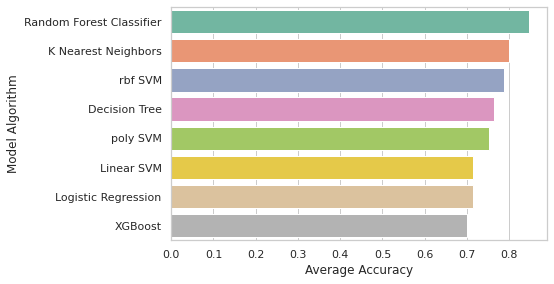

In [59]:
# visualization
sns.barplot(y='Model Algorithm',x='Average Accuracy',data=avg_accu_sum,
            palette=sns.color_palette("Set2"));

We can see that random forest classifier provides the best prediction performance consistently. The average accuracy is 86.7% on the cross validation sets. Note that the purpose of cross validation is to estimate the model performance more closely rather than improving the model performance for model selection purpose.  


#### __Grid Search__
The following section includes grid search for each individual model for the best parameter. Limited parameters are tuned using grid search due to processing time. 

Genetic algorithm and Bayesian optimization can also be used for hyper parameter tuning/optimization; this can be investigated further in future study.

#### 3.1.1 Logistic Regression

In [60]:
from sklearn.model_selection import GridSearchCV
params={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'penalty':['l1','l2'],
        'random_state':[44]}

grid_lr=GridSearchCV(estimator = LogisticRegression(),
                    param_grid = params,
                    scoring = 'accuracy',
                    cv=10,
                    verbose = 1,
                    n_jobs = -1
                   );

def grid_results(grid_model):
    grid_model.fit(X_train_SMOTE,y_train_SMOTE);
    print(grid_model.best_params_)

    # Mean cross-validated score of the best_estimator (accuracy)
    print('Grid Search Accuracy ',"%.4f" % grid_model.score(X_test,y_test))

grid_results(grid_lr)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.5s


{'C': 0.01, 'penalty': 'l2', 'random_state': 44}
Grid Search Accuracy  0.7284


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.8s finished


In [61]:
grid_acc = []
grid_acc.append(grid_lr.score(X_test,y_test))

#### 3.1.2 Decision Tree 

A decision tree is a series of sequential decisions made to reach a specific result, based on a set of features present in the data. The sequence of attributes to be checked is decided on the basis of criteria such as information gain. [8]


In [62]:
params={
    'criterion':['gini', 'entropy'],
    'splitter':['best','random'],
    'random_state':[4]
}

grid_dt=GridSearchCV(estimator = DecisionTreeClassifier(),
                    param_grid = params,
                    scoring = 'accuracy',
                    cv=10,
                    verbose = 1,
                    n_jobs = -1
                   );

grid_results(grid_dt)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 10 folds for each of 4 candidates, totalling 40 fits
{'criterion': 'entropy', 'random_state': 4, 'splitter': 'random'}
Grid Search Accuracy  0.7958


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.3s finished


In [63]:
grid_acc.append(grid_dt.score(X_test,y_test))

#### 3.1.3 Random Forest 

Random forest is a forest of decision trees as sometimes a single tree is not sufficient for producing effective results. Random forest randomly creates decision trees with a random subset of features to calculate the output, and combines the output of individual decision trees to generate the final output. Theoretically, random forest would perform better than decision tree. [8]

In [64]:
params={
    'n_estimators':[100, 500, 1000,1500, 2000],
    'max_depth':[40, 70, 100, None],
    'max_features':['auto','sqrt','log2'],
    'bootstrap': [True, False],
    'random_state':[4]
}

grid_rf=GridSearchCV(estimator=RandomForestClassifier(),
                     param_grid=params,
                     scoring='accuracy',
                     cv=10,                    
                     verbose = 1,
                     n_jobs = -1);

grid_rf.fit(X_train_SMOTE,y_train_SMOTE);

grid_results(grid_rf)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 17.5min finished


Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 17.5min finished


{'bootstrap': False, 'max_depth': 40, 'max_features': 'auto', 'n_estimators': 100, 'random_state': 4}
Grid Search Accuracy  0.8496


In [65]:
grid_acc.append(grid_rf.score(X_test,y_test))

#### 3.1.4 XGBoost 

XGBoost (eXtreme Gradient Boosting) is an advanced implementation of gradient boosting algorithm. In gradient boosting, new models are created to predict the residuals or errors of prior models and then add together to make the final prediction[10] It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models[10]  XGBoost is almost 10 times faster than other gradient boosting techniques. It includes a variety of regularization which reduces overfitting and improves overall performance. 

In [66]:
params = {"eta": [0.15, 0.25, 0.35,0.45,0.55,0.75,0.85,0.95],
          'gamma': [0, 0.5, 1, 1.5, 2, 5],
          'colsample_bytree': [0.6, 0.8, 1.0]
         }

xgb = xgboost.XGBClassifier(random_state=33, 
                    objective='binary:logistic'
                           );

grid_xgb=GridSearchCV(estimator=xgb,
                     param_grid=params,
                     scoring='accuracy',
                     cv=10,                    
                     verbose = 1,
                     n_jobs = -1);

grid_xgb.fit(X_train_SMOTE,y_train_SMOTE);

grid_results(grid_xgb)


Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:   46.1s finished


Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:   45.1s finished


{'colsample_bytree': 0.6, 'eta': 0.55, 'gamma': 0}
Grid Search Accuracy  0.7005


In [67]:
grid_acc.append(grid_xgb.score(X_test,y_test))

#### 3.1.5 Support Vector Machine 
SVM finds a hyperplane with the largest amount of margin between two class of data in N-dimension space, where N is the number of features. There are different SVM kernels, linear, rbf(guassian), polynomial etc. It's hard to visualize a 10-dimensional space (we have 10 features) so we are going to try linear, rbf and polynomial. 


In [68]:
params = {
    'C': [0.1, 1, 10, 100, 1000],  
    'gamma': [0.001,0.01,0.1,1,10,100], 
    'gamma':['scale', 'auto'],
    'kernel':['rbf','linear','sigmoid']}

grid_svc=GridSearchCV(estimator=SVC(),
         param_grid=params,
         scoring='accuracy',
         cv=10,
         verbose = 1,
         n_jobs = -1);

grid_svc.fit(X_train_SMOTE,y_train_SMOTE);

grid_results(grid_svc)


Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.5min finished


Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.4min finished


{'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}
Grid Search Accuracy  0.8305


In [69]:
grid_acc.append(grid_svc.score(X_test,y_test))

#### 3.1.6 K-Nearest Neighbor

KNN is a non-parametric algorithm that assumes no underlying data distribution. KNN uses all data points at once for prediction / classification. [12] Therefore, KNN tends to need more time to scan all data points and use more memory for storing all data points. The number of neighbours, k, is the core deciding factor in model generation. For a given point P1, the algorithm find the k closest points to P1 and then classify points by majority vote of its k neighbors. When K is small, the model would be influenced more by outliers. The model would have a more flexible fit, low bias and high variance, whereas with a large number of neighbours, there would be a more smoother decision boundary, low variance and high bias. [12]



In [70]:
params = {
    'n_neighbors' : [1,2,3,4,5,6,7,8,9,10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_kn = GridSearchCV(estimator = KNeighborsClassifier(),
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 10, 
                        verbose = 1,
                        n_jobs = -1,
                        );

grid_kn.fit(X_train_SMOTE, y_train_SMOTE);

grid_results(grid_kn)


Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 512 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Done 512 tasks      | elapsed:    1.7s


{'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'uniform'}
Grid Search Accuracy  0.8366


[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    2.8s finished


In [71]:
grid_acc.append(grid_kn.score(X_test,y_test))

#### __Summary of the Best Parameters for each model__

In [72]:
grid_acc

[0.7283866575901974,
 0.7957794417971409,
 0.8495575221238938,
 0.7004765146358066,
 0.8304969366916269,
 0.8366235534377128]

In [73]:
model_names_gs=['Logistic Regression',
             'Decision Tree',
             'Random Forest Classifier',
             'XGBoost',
             'rbf SVM',
             'K Nearest Neighbors',
            ]

grid_summary = pd.DataFrame({'Model Algorithm':model_names_gs,'Grid Search Accuracy': grid_acc})
grid_summary.sort_values(['Grid Search Accuracy'],ascending=False)

Model Algorithm  Grid Search Accuracy
2  Random Forest Classifier              0.849558
5       K Nearest Neighbors              0.836624
4                   rbf SVM              0.830497
1             Decision Tree              0.795779
0       Logistic Regression              0.728387
3                   XGBoost              0.700477

In [74]:
summary_2 = summary_0.iloc[:, 0:2].drop([6, 4])
summary_2

Model Algorithm  Accuracy
0       Logistic Regression  0.724983
1             Decision Tree  0.759700
2  Random Forest Classifier  0.846154
3                   XGBoost  0.701838
5                   rbf SVM  0.786930
7       K Nearest Neighbors  0.790334

In [75]:
df = pd.merge(grid_summary, summary_2, on="Model Algorithm").sort_values(['Grid Search Accuracy'],ascending=False)
df

Model Algorithm  Grid Search Accuracy  Accuracy
2  Random Forest Classifier              0.849558  0.846154
5       K Nearest Neighbors              0.836624  0.790334
4                   rbf SVM              0.830497  0.786930
1             Decision Tree              0.795779  0.759700
0       Logistic Regression              0.728387  0.724983
3                   XGBoost              0.700477  0.701838

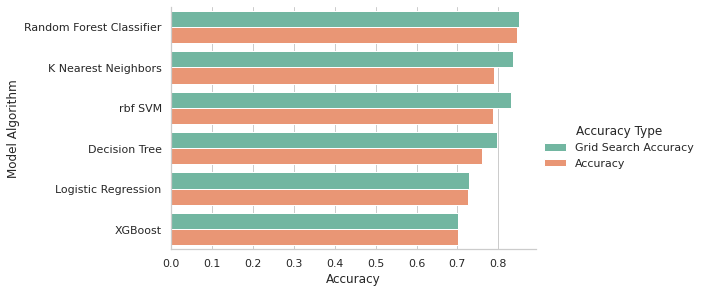

In [76]:
df_2 = pd.melt(df, id_vars="Model Algorithm", var_name="Accuracy Type", value_name="Accuracy")
sns.catplot(y='Model Algorithm', x='Accuracy', hue='Accuracy Type', data=df_2, kind='bar', height=4, aspect=2, palette="Set2")


Grid search can be very slow when the parameter dictionary for optimization is large. I didn't include as many parameter values to exhaust the grid search. The model improvement based on accuracy is not a significant leap for each model. And for XGBoost, it's actually a bit worse (there's probably some error as the warning message; there are better ways to tune XGBoost). RandomizedSearchCV could have used instead. Other optimization methods such as genetic algorithm should be investigated in the future. 

### 3.2 Deep Learning with Neural Network Models 
A simple NN is created here. 

In [280]:
# pip install keras
X_train_SMOTE.shape[1]/100

0.1

In [281]:
from keras.models import Sequential
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(10, activation='relu', input_shape=(10,)))

# Add one hidden layer 
model.add(Dense(20, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

# Model output shape
model.output_shape

(None, 1)

In [283]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train_SMOTE, y_train_SMOTE, epochs=40, batch_size=1, verbose=1, validation_data=(X_test, y_test))



Epoch 1/40
5392/5392 [==============================] - 5s 873us/step - loss: 0.3418 - accuracy: 0.8492 - val_loss: 0.5718 - val_accuracy: 0.7325
Epoch 2/40
5392/5392 [==============================] - 4s 802us/step - loss: 0.3401 - accuracy: 0.8429 - val_loss: 0.5425 - val_accuracy: 0.7536
Epoch 3/40
5392/5392 [==============================] - 4s 749us/step - loss: 0.3430 - accuracy: 0.8451 - val_loss: 0.5416 - val_accuracy: 0.7536
Epoch 4/40
5392/5392 [==============================] - 4s 761us/step - loss: 0.3411 - accuracy: 0.8476 - val_loss: 0.5635 - val_accuracy: 0.7536
Epoch 5/40
5392/5392 [==============================] - 4s 764us/step - loss: 0.3393 - accuracy: 0.8494 - val_loss: 0.5472 - val_accuracy: 0.7570
Epoch 6/40
5392/5392 [==============================] - 4s 762us/step - loss: 0.3393 - accuracy: 0.8490 - val_loss: 0.5533 - val_accuracy: 0.7549
Epoch 7/40
5392/5392 [==============================] - 4s 768us/step - loss: 0.3377 - accuracy: 0.8500 - val_loss: 0.5156 -

In [80]:
y_pred = model.predict(X_test)

# classify, less than 50% bad wine, more than 50% good wine 
for y in range(len(y_pred)):
    y_pred[y] = 0 if y_pred[y] <= 0.5 else 1
    
y_pred

array([[1.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [81]:
score = model.evaluate(X_test, y_test, verbose=1)
print(score)

46/46 [==============================] - 0s 844us/step - loss: 0.4670 - accuracy: 0.7740
[0.4670376777648926, 0.7739959359169006]


In [82]:
model_evaluation(y_test, y_pred, output=['Bad Wine', 'Good Wine'])

Accuracy: 0.774
------------------------------------------------------------
classification report:

               precision    recall  f1-score   support

    Bad Wine       0.91      0.79      0.84      1140
   Good Wine       0.50      0.72      0.59       329

    accuracy                           0.77      1469
   macro avg       0.70      0.76      0.72      1469
weighted avg       0.82      0.77      0.79      1469

------------------------------------------------------------
Confusion matrix:

          Predicted:     
                   0    1
Actual: 0        899  241
        1         91  238


In [83]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


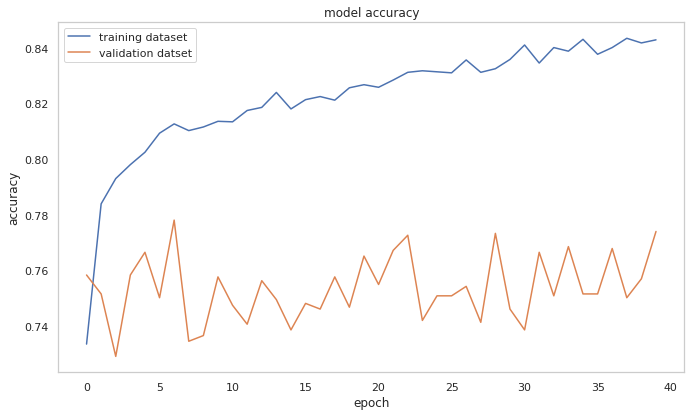

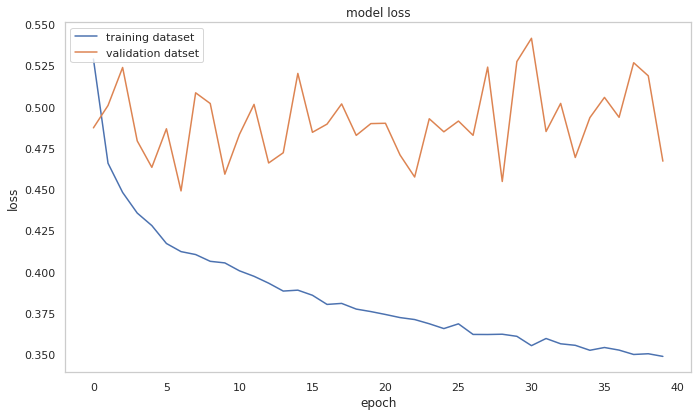

In [84]:
# summarize history for accuracy

plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training dataset','validation datset'], loc='upper left')
plt.grid(b=None)
plt.show()

# summarize history for loss
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training dataset','validation datset'], loc='upper left')
plt.grid(b=None)
plt.show()

The performance (accuracy) on the validation dataset oscillates as shown on the first plot. It could be due to the learning rate is too high. 

To improve the performance of the neural network: 
- hyper parameter tuning with grid search or other optimization methods 
   - batch size
   - try different optimizer 
   - loss function 
- schedule a learning rate
- regularization 
- try different NN topology 


## 4. Model Interpretability: feature importance

It would be interesting to try to understand how models make predictions. Random forest is the best model for this dataset; a visualization of the trees is plotted and feature importance of random forest is explored. 

XGBoost with unprocessed data was the original model used for this assignment in the first draft. Analysis from the draft is also presented here. Effect of feature scaling and feature balancing is briefly discussed.

### 4.1 Random Forest 

In [57]:
# load the model 
# {'bootstrap': False, 'max_depth': 40, 'max_features': 'auto', 'n_estimators': 100, 'random_state':4}
RF = RandomForestClassifier(bootstrap= False,
                            max_depth=40, 
                            max_features = 'auto', 
                            n_estimators = 100, 
                            random_state = 4)

RF.fit(X_train_SMOTE,y_train_SMOTE)
pred=RF.predict(X_test)
model_evaluation(y_test, pred, output=['Bad Wine', 'Good Wine'])


Accuracy: 0.8496
------------------------------------------------------------
classification report:

               precision    recall  f1-score   support

    Bad Wine       0.92      0.89      0.90      1140
   Good Wine       0.65      0.72      0.68       329

    accuracy                           0.85      1469
   macro avg       0.78      0.80      0.79      1469
weighted avg       0.86      0.85      0.85      1469

------------------------------------------------------------
Confusion matrix:

          Predicted:     
                   0    1
Actual: 0       1011  129
        1         92  237


#### 4.1.1 Tree Plot

The intention was to plot out a single tree to see how decision is made. However, the plotted tree is very big and the nodes overlap with each other. It's also time consuming to generate such tree plot. (See the png file in the zip). Maybe we should consider a different way to evaluate how the model makes decision. 

In [ ]:
### the following code is not executeable as I am not sure how to install graphviz on the cloud terminal 
### graphviz need to be installed as a python pacakge as well as on the system 
### the tree.dot file was generated but cannot be displayed 

#### 4.1.2 Feature Importance 

So we turn to feature importanec to explain the classification decision made by the random forest. 

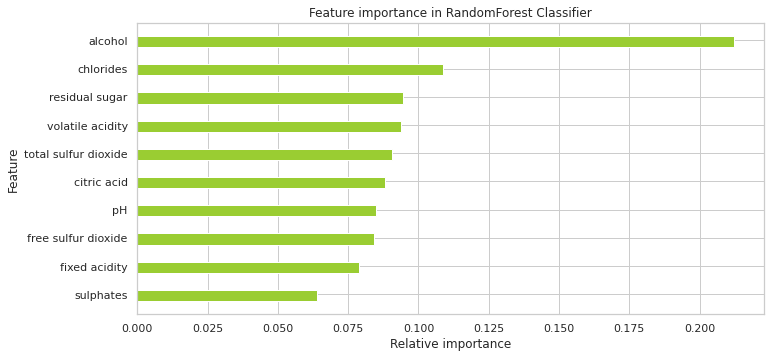

<Figure size 1440x720 with 0 Axes>

In [179]:
col = list(X_train_SMOTE.columns)

y = RF.feature_importances_
ind = [i[0] for i in sorted(enumerate(y), key=lambda x:x[1])]

label=[]
for f in range(len(ind)):
    label.append(col[ind[f]])
    
y = sorted(y)

# plot
fig, ax = plt.subplots() 
bar_width = 0.4 
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, bar_width, color='yellowgreen')
ax.set_yticks(ind+bar_width/10)
ax.set_yticklabels(label, minor=False)
plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('Feature') 
plt.figure(figsize=(20,10))
fig.set_size_inches(10, 5,forward=True)

__Interpretation with SHapley Additive exPlanations (SHAP)__

Another way to explore explanations for the model prediction results is to use SHAP. The objective SHAP is to explain the prediction of an instance x by computing the contribution of each feature to the prediction[16]. Shapley values are computed from using SHAP, which connects game theory with local explanations. 

We can imagine that there's a room and all the feature enter the room in a random order. All feature values in the room participate in the game (that is contribute to the prediction). The Shapley value is the average marginal contribution of feature value by joining whatever features already entered the room before[17]. 

__Feature Importance__

This basically takes the average of the SHAP value magnitudes across the dataset and plots it as a simple bar chart of the variable importance plot. It lists the most significant variables in descending order. 

In [ ]:
# pip install shap

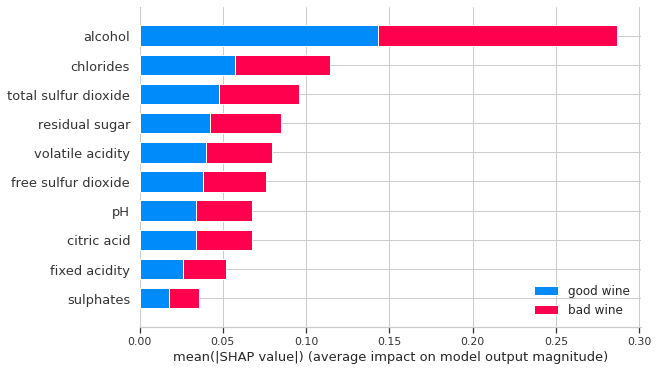

In [292]:
import shap
shap_values = shap.TreeExplainer(RF).shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar",class_names= ['bad wine','good wine'])

'Alcohol' contributes the most to the prediction class and thus have high predictive power. This is in line with the feature_importance_ results. 

__Partial Dependence Plot__

If we are interested to see the marginal effect of 'alcohol' feature on the predicted outcome of our random forest, we could plot a partial dependence plot. Partial Dependence Plot (PDP) was introduced by Friedman (2001) with purpose of interpreting complex Machine Learning algorithm. It helps understand variable importance in the model. 

This dependence_plot function in SHAP automatically includes a feature that the feature of interest interacts most with. 

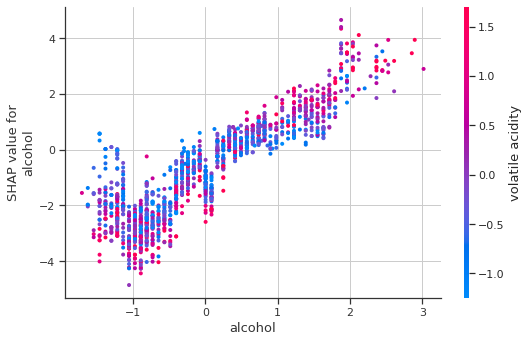

In [294]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
shap.dependence_plot('alcohol', shap_values, X_test)

PDP builds the model averaging other predictor variable except one choosen predictor variable 'alcohol' and measures change in response the prediction output to identify how a varaible is affecting the model.

__Force Plot__

Features pushing the prediction higher than the base value are shown in red, those pushing the prediction lower are in blue. The first one depicts the class of the particular wine sample is good wine, and the second quality class is bad wine pushed by free sulfur dioxide, pH, fixed acidity, alcohol, and chlorides. 

In [295]:
# load JS visualization 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [296]:
shap.force_plot(explainer.expected_value, shap_values[4,:], X_test.iloc[4,:])

Force plot can also visualize and explain multiple data sample predictions at once using an interactive plots.

In [297]:
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X_test.iloc[:1000,:])

### 4.2 XGBoost

This was the original model for this assignment focusing on interpreting the feature importance as model interpretability. XGBoost was selected to use due to its high popularity in keggle. 

The grid search parameters are used for the base model: 
{'colsample_bytree': 0.6, 'eta': 0.55, 'gamma': 0}

Note that in the draft, no feature engineering was used but higher accuracy was achieved 82.5% on the testing dataset. It could suggest that feature engineering implemented here was not the best. So here we test out the X_train and X_test without feature scaling and data class balancing (Density is dropped however). 


#### 4.2.1 Base Model 

In [197]:
# xgb base model 
xgb = xgboost.XGBClassifier(objective='binary:logistic', 
                            colsample_bytree=0.6,
                            gamma = 0, 
                            learning_rate = 0.55,
                            random_state=33, 
                            n_jobs=-1)
xgb.fit(X_train_SMOTE, y_train_SMOTE)
xgb_predictions = xgb.predict(X_test)


#### 4.2.2 Feature Importance

XGBoost library has a global feature importance calculations. Generally, importance provides a score to indicate how useful or valuable each feature is in building the boosted decision trees within the model. The more the feature is used to make key decisions with decision trees, the higher its relative importance. [6]

There are three different ways to calculate feature importance with feature weights, coverage and gain parameters. Feature weights is calculated based on the number of times a feature appears in a tree across the ensemble of trees. Coverage is the average coverage of splits that use the feature, in other words, the number of samples affected. Gain is the average gain of splits which use the feature. The XGBoost default calculation method is "weight".[7]

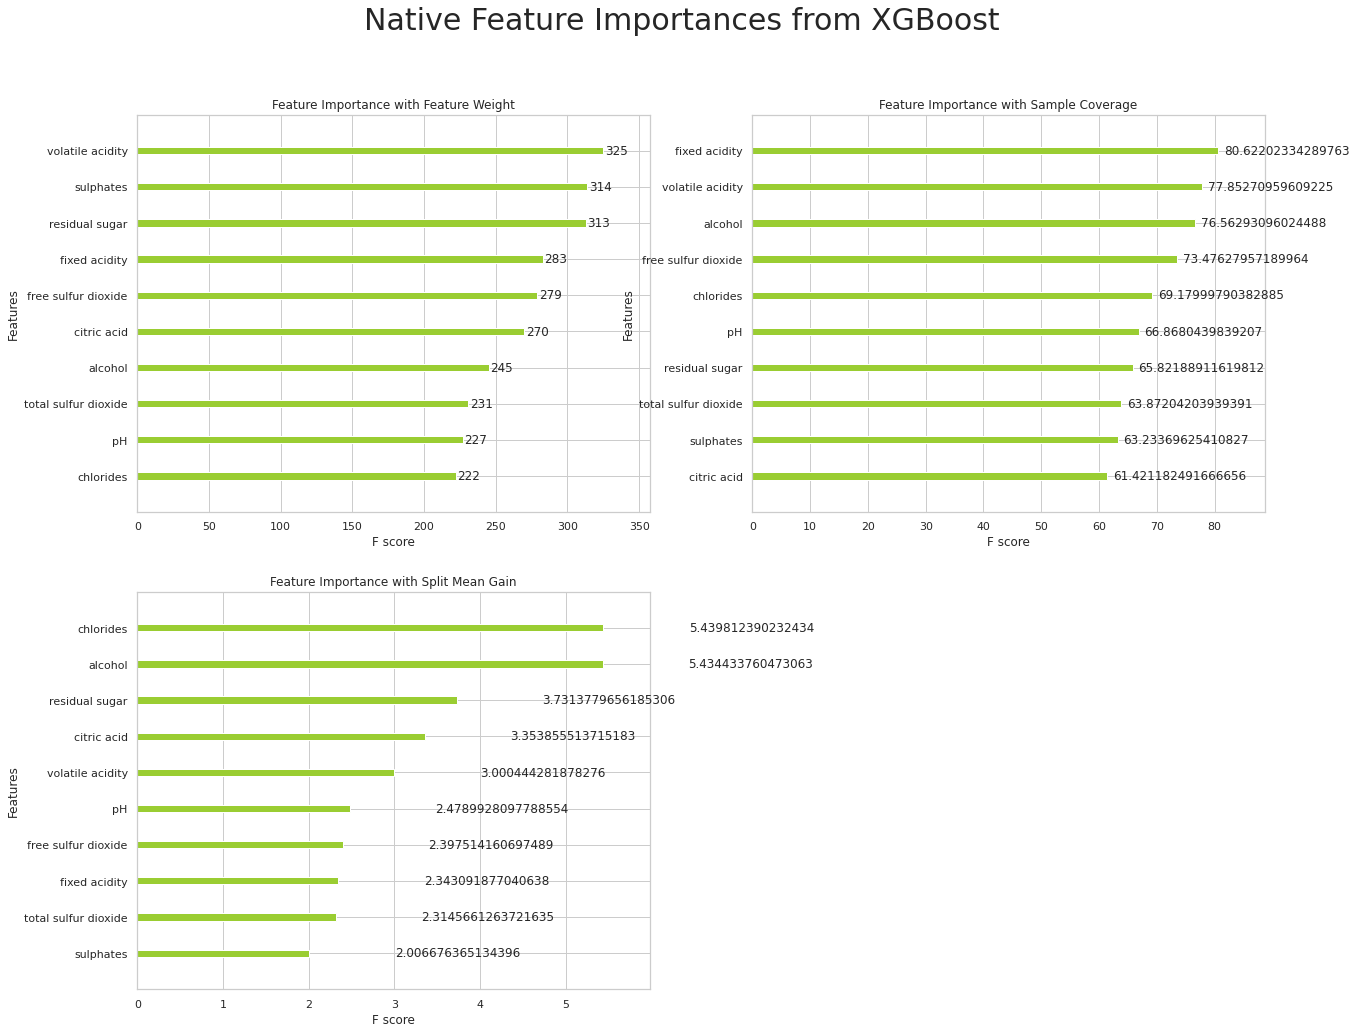

In [198]:
# Feature Importance
# plot XGBoost default feature importances
fig = plt.figure(figsize = (18, 15))
title = fig.suptitle("Native Feature Importances from XGBoost", fontsize=30)

# "weight" is the number of times a feature appears in a tree
ax1 = fig.add_subplot(2, 2, 1)
xgboost.plot_importance(xgb, importance_type='weight', ax=ax1, color='yellowgreen')
ax1.set_title("Feature Importance with Feature Weight");

# "gain" is the average gain of splits which use the feature 
ax2 = fig.add_subplot(2, 2, 2)
xgboost.plot_importance(xgb, importance_type='cover', ax=ax2, color='yellowgreen')
ax2.set_title("Feature Importance with Sample Coverage");

# "cover" is the average coverage of splits which use the feature wehere coverage is 
# defined as the number of samples affected by the split 
ax3 = fig.add_subplot(2, 2, 3)
xgboost.plot_importance(xgb, importance_type='gain', ax=ax3, color='yellowgreen')
ax3.set_title("Feature Importance with Split Mean Gain");


Let's test each subset of features by importance (gain), starting with all features and ending with a subset with the most important feature. For simplicity, let's just use accuracy as the evaluation metrics. 

In [201]:
# select features using threshold
from sklearn.feature_selection import SelectFromModel

# fit model using each importance as a threshold
thresholds = sorted(xgb.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train_SMOTE)
    # train model
    selection_model = xgboost.XGBClassifier()
    selection_model.fit(select_X_train, y_train_SMOTE)
    # eval model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))


Thresh=0.071, n=10, Accuracy: 70.18%
Thresh=0.071, n=9, Accuracy: 70.73%
Thresh=0.073, n=8, Accuracy: 67.39%
Thresh=0.078, n=7, Accuracy: 64.19%
Thresh=0.089, n=6, Accuracy: 62.01%
Thresh=0.096, n=5, Accuracy: 59.36%
Thresh=0.098, n=4, Accuracy: 58.82%
Thresh=0.110, n=3, Accuracy: 51.19%
Thresh=0.128, n=2, Accuracy: 35.53%
Thresh=0.186, n=1, Accuracy: 32.81%


When n = 10, we have the highest accuracy (0.7018) and then the model accuracy decreases with the number of selected features. In the last draft of this assignment where no feature engineering (feature scaling or class balancing or dropping features) was implemented, the accuracy with including 10 features are as high as 80.95%. This could suggest that our preprocessing is actually making the model worse.  So let's test it out with X_train (unbalanced unscaled training set). 

In [253]:
# xgb base model 
xgb = xgboost.XGBClassifier(objective='binary:logistic', 
                            colsample_bytree=0.6,
                            gamma = 0, 
                            learning_rate = 0.55,
                            random_state=33, 
                            n_jobs=-1)
xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test)


# select features using threshold
from sklearn.feature_selection import SelectFromModel

# fit model using each importance as a threshold
thresholds = sorted(xgb.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = xgboost.XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))


Thresh=0.071, n=10, Accuracy: 85.91%
Thresh=0.071, n=9, Accuracy: 86.11%
Thresh=0.073, n=8, Accuracy: 86.39%
Thresh=0.078, n=7, Accuracy: 84.82%
Thresh=0.089, n=6, Accuracy: 84.48%
Thresh=0.096, n=5, Accuracy: 83.46%
Thresh=0.098, n=4, Accuracy: 83.32%
Thresh=0.110, n=3, Accuracy: 81.35%
Thresh=0.128, n=2, Accuracy: 79.31%
Thresh=0.186, n=1, Accuracy: 79.71%


We can see a dramatic increase in the model prediction accuracy as high as 86.39% with 8 most important features being included (pH and chlorides are excluded). The following section will be carried out with X_test model. 

Thresh=0.072, n=8, Accuracy: 86.39%


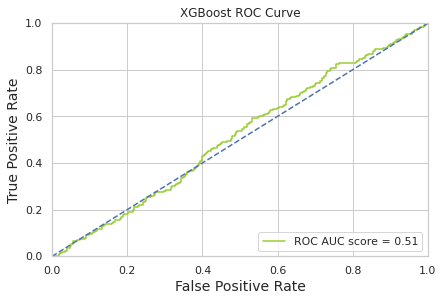

In [207]:
# select features using threshold
from sklearn.feature_selection import SelectFromModel

# fit model using each importance as a threshold
thresholds = sorted(xgb.feature_importances_)
thresh = 0.072

# select features using threshold
selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)

# train model
selection_model = xgboost.XGBClassifier()
selection_model.fit(select_X_train, y_train)

# eval model
select_X_test = selection.transform(X_test)
predictions = selection_model.predict(select_X_test)
accuracy = accuracy_score(y_test, predictions)
print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

probs = xgb.predict_proba(select_X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('XGBoost ROC Curve')
plt.plot(fpr, tpr, 'yellowgreen', label = 'ROC AUC score = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--',)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
plt.show()

ROC AUC score is now 0.5 -  let's check the confusion matrix. 

In [216]:
# Evaluate predictions
model_evaluation(y_test, predictions, output=['Bad Wine', 'Good Wine'])

Accuracy: 0.8639
------------------------------------------------------------
classification report:

               precision    recall  f1-score   support

    Bad Wine       0.89      0.95      0.92      1140
   Good Wine       0.76      0.58      0.66       329

    accuracy                           0.86      1469
   macro avg       0.82      0.76      0.79      1469
weighted avg       0.86      0.86      0.86      1469

------------------------------------------------------------
Confusion matrix:

          Predicted:     
                   0    1
Actual: 0       1079   61
        1        139  190


In [217]:
y_test.value_counts()

0    1140
1     329
Name: quality, dtype: int64

In [218]:
1140/(1140+329)

0.7760381211708646

Ok so the model is not assuming all classes to be class 0 ('bad wine'). If we were to use n=10, AUC ROC score would be higher - the effect of class imbalance is smaller. 

Thresh=0.070, n=10, Accuracy: 85.91%


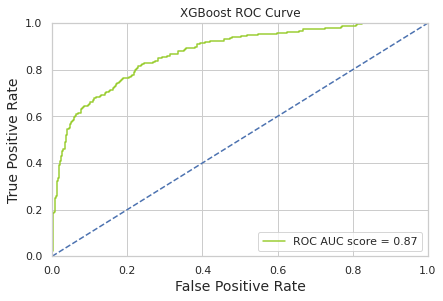

In [220]:
# select features using threshold
from sklearn.feature_selection import SelectFromModel

# fit model using each importance as a threshold
thresholds = sorted(xgb.feature_importances_)
thresh = 0.070

# select features using threshold
selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)

# train model
selection_model = xgboost.XGBClassifier()
selection_model.fit(select_X_train, y_train)

# eval model
select_X_test = selection.transform(X_test)
predictions = selection_model.predict(select_X_test)
accuracy = accuracy_score(y_test, predictions)
print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

probs = xgb.predict_proba(select_X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('XGBoost ROC Curve')
plt.plot(fpr, tpr, 'yellowgreen', label = 'ROC AUC score = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--',)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
plt.show()

__Feature Importance with ELI5 Model__

ELI5 (explained like I'm 5) is a python package that helps to debug machine learning classifiers and explain their predictions[8]. It provides support for XGBoost that it explain predictions of XGBClassifier. 

In [221]:
#pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

Couldn't import dot_parser, loading of dot files will not be possible.


In [222]:
# different visualization, same information as before from xgboost feature importance 
# this is to insepct model parameters and try to figure out how the model works globally
eli5.show_weights(xgb.get_booster(), importance_type = 'gain')

In [224]:
# this is to inspect an individual prediction of a model, trying to figure out 
# why the model makes the decision it makes 
wine_nb = 0 # in predicting good wines 
print('Reference:', y_test.iloc[wine_nb])
print('Predicted:', xgb_predictions[wine_nb])
eli5.show_prediction(xgb.get_booster(), X_test.iloc[wine_nb], 
                     feature_names=col, show_feature_values=True)

Reference: 1
Predicted: 1


Every prediction of the model can be presented as a sum of feature contributions and the bias. ELI5 explains how the features lead to a particular prediction by showing weights for each feature depicting how influential it might have in contributing to the final prediction decision across all trees[2]. The <BIAS> term is the average score you may get going through all the trees - the expected average score output by the model, based on the distribution of the training set [9].
    
So alcohol and free sulfur dioxide are important features in deciding if a wine has a good quality. 

In [227]:
# in predicting bad wine
wine_nb = 4
print('Reference:', y_test.iloc[wine_nb])
print('Predicted:', xgb_predictions[wine_nb])
eli5.show_prediction(xgb.get_booster(), X_test.iloc[wine_nb], 
                     feature_names=col, show_feature_values=True)

Reference: 0
Predicted: 0


Citric acid, sulphates and total sulfur dioxide are the important features in deciding if a wine has a bad quality. 

__Feature Importance with SKATER__

In [228]:
#pip install skater==1.0.4
#pip install skater==1.1.2

Skater is a Python library designed with the gaol to demystify the inner workings of any type of predictive model that is language and framework agnostic. It can evaluate the behavior of a model on a complete data set or on a single prediction. In other words, it allows model interpretation both globally (inference on the basis of a complete dataset) and locally (inference on the basis of an individual prediction)[13].

For global explanations, Skater uses model-agnostic variable importance and partial dependence plots to judge the bias of a model and understand its general behavior[13]. For local explanation, Skater uses a relatively new technique called local interpretable model agnostic explanation (LIME)[13]. LIME uses local surrogate models to assess performance. By perturbing the input of the model and observing how the predictions change, LIME can learn the behavior of the underlying model[14]. An explanation can be generated by approximating the underlying model by an interpretable model, trained by the perturbations of the original instance [14]. Using a simple model locally (region around the prediction we would like to explain), it is much easier to approximate a black-box model [14].   

<img src="Skater.png">


In [254]:
# [15]
# The overall workflow within the skater package is to create an interpretation, 
# create a model, and run interpretation algorithms

from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

interpreter = Interpretation(training_data=X_test, training_labels=y_test, feature_names=col)

# "To begin using the interpretation to explain models, we need to create a Skater model. 
# To create a skater model base on a local function or method, pass in the predict function 
# to an InMemoryModel." [15]

im_model = InMemoryModel(xgb.predict_proba, examples=X_train, target_names=['Bad Wine', 'Good Wine'])

In [255]:
# Feature importance - value error 
plots = interpreter.feature_importance.plot_feature_importance(im_model)

2020-12-18 15:50:20,720 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


ValueError: Can't get rows for data of type <class 'pandas.core.series.Series'>

In [252]:
# partial dependence plot - value error 
r = interpreter.partial_dependence.plot_partial_dependence(['alcohol'], im_model, grid_resolution=50, 
                                                           grid_range=(0,1), n_samples=23000, 
                                                           with_variance=True, figsize = (6, 4))
yl = r[0][1].set_ylim(0, 1) 

ValueError: Can't get rows for data of type <class 'pandas.core.series.Series'>

In [239]:
predictions = xgb.predict_proba(X_test.values)

from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer
exp = LimeTabularExplainer(X_test.values, feature_names=col, discretize_continuous=True, class_names=['Bad Wine', 'Good Wine'])

In [241]:
wine_nb = 4
print('Reference:', y_test.iloc[wine_nb])
print('Predicted:', predictions[wine_nb])
exp.explain_instance(X_test.iloc[wine_nb].values, xgb.predict_proba).show_in_notebook()

Reference: 0
Predicted: [0.9988088 0.0011912]


In [242]:
wine_nb = 0
print('Reference:', y_test.iloc[wine_nb])
print('Predicted:', predictions[wine_nb])
exp.explain_instance(X_test.iloc[wine_nb].values, xgb.predict_proba).show_in_notebook()

Reference: 1
Predicted: [0.2426821 0.7573179]


Consistent with ELI5 model; 

__Tree Surrogate__

Below is code to create a global surrogate model for XGBoost. A global surrogate model is a trained interpretable model to approximate the predictions of a black box model. It helps us to draw conclusions about the black box model by interpreting the surrogate model. 

To build explainable surrogate models in Skater, the base estimator could be any form of a supervised learning predictive model — our black box model. The explanations are approximated using Decision Trees by learning decision boundaries similar to that learned by the base estimator (predictions from the base model are used for learning the Decision Tree representation). The implementation also generates a fidelity score to quantify tree based surrogate model’s approximation to the base estimator. Ideally, the score should be 0 for truthful explanation both globally and locally.

However, the skater model installed is 1.0.4 and there's no tree_surrogate function class. 1.0.4 was installed as a way around to install Skater as installing the latest package was unsuccessful. 

For an example of tree surrogate, see here: https://towardsdatascience.com/explainable-artificial-intelligence-part-3-hands-on-machine-learning-model-interpretation-e8ebe5afc608

In [272]:
pip show skater

Name: skater
Version: 1.0.4
Summary: Model Agnostic Interpretation Library
Home-page: https://github.com/datascienceinc/skater/
Author: Aaron Kramer, DataScience.com Team, Pramit Choudhary
Author-email: dstm@datascience.com
License: MIT
Location: /home/user/.local/lib/python3.7/site-packages
Requires: multiprocess, pandas, dill, ds-lime, requests, scikit-learn
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [275]:
from skater.core.explanations import Interpretation
skater.core.explanantions.interpretation??

Object `skater.core.explanantions.interpretation` not found.


## 5. Future Work

Overall the accuracy of the models presented aren't crazy high, which is not necessary a bad thing considering the dataset distribution. The best model is random forest. More can be done to further fine tune the model and increase the robustness of the study: 

1. A more comprehensive outlier analysis could be conducted. Execute the example outlier study proposed in section 1.1 : Comparison study between removed outliers version vs not removed to verify if those outliers in fact influenced the model accuracy. 
2. Could be interesting to do a robust study on imbalanced datasets.
3. Could also be interesting to do a robust study on feature scaling. 
4. Try GA and other optimization methods for hyper parameter tuning - a comparison study on different hyperparameter tuning optimization methods. 
5. The neural network model needs further tuning. 
6. Get skater library to be properly installed to implement a tree surrogate. 
7. Manually create a surrogate model for Neural network following: Steps to obtain a surrogate model [10]: 
    1. Select a dataset X. This can be the same dataset that was used for training the black box model or a new dataset from the same distribution.
    2. For the selected dataset X, get the predictions of the black box model. 
    3. Select an interpretable model type (linear model, decision tree...)
    4. Train the interpretable model on the dataset X and black box model predictions.
    5. Congratulations! You now have a surrogate model. 
    6. Measure how well the surrogate model replicates the predictions of the black box model by using metrics such as R-squared for regression and AUC ROC score for classification. 
    7. Interpret the surrogate model. 

8. Since normal wine drinkers don't have anything instruments to measure all those feature attributes, perhaps incorporating with a label image processing app, this analysis would be actually helpful. 


## Reference

[1] https://archive.ics.uci.edu/ml/datasets/wine+quality

[2] https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too#:~:text=In%20winemaking%2C%20the%20use%20of,dioxide%20(SO2)%20is%20critical.&text=The%20FSO2%20and%20the%20pH,wine%20from%20oxidation%20and%20spoilage.

[3] https://www.freecodecamp.org/news/how-machines-make-predictions-finding-correlations-in-complex-data-dfd9f0d87889/

[4] https://towardsdatascience.com/how-to-deal-with-imbalanced-data-34ab7db9b100

[5] https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

[6] https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

[7] Jayawant N. Mandrekar. Receiver Operating Characteristic Curve in Diagnostic Test Assessment.*Journal of Thoracic Oncology.* Vol 5, Issue 9. September 2010. P1315 - 1316. doi:10.1097

[8] https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/

[9] https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/?utm_source=blog&utm_medium=decision-tree-vs-random-forest-algorithm

[10] https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/

[11] https://xgboost.readthedocs.io/en/latest/

[12] https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

[13] https://www.oreilly.com/content/interpreting-predictive-models-with-skater-unboxing-model-opacity/

[14] https://www.oreilly.com/content/introduction-to-local-interpretable-model-agnostic-explanations-lime/

[15] https://oracle.github.io/Skater/tutorial.html

[16] https://www.kaggle.com/datacog314/tutorial-machine-learning-interpretability/comments

[17] https://christophm.github.io/interpretable-ml-book/global.html